# Avacado Project


## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_avacado= pd.read_csv("avocado.csv")
df_avacado

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Importing the dataset and analyze all the columns 

## Shape of data with number of rows and columns


In [3]:
df_avacado.shape

(18249, 14)

There are 18249 rows and 14 columns in dataset

## Understanding of dataset columns

The dataset consists of 14 columns as explained below:

1. Date: The date of the observation.
2. AveragePrice: Average price of a single avacado.
3. Total Volume: Total number of avacado sold.
4. 4046: Total number of avocados with PLU (Product Lookup Code) 4046 sold.
5. 4225: Total number of avocados with PLU (Product Lookup Code) 4225 sold.
6. 4770: Total number of avocados with PLU (Product Lookup Code) 4770 sold.
7. Total Bags: Total number of bags of avocados sold.
8. Small Bags: Total number of small bags of avocados sold.
9. Large Bags: Total number of large bags of avocados sold.
10. XLarge Bags: Total number of extra large bags of avocados sold.
11. type: Type of avocados (conventional or organic).
12. year: The year of the observation.
13. region: City or region of the observation.
14. Unamed: 0-It is just an index feature.

## Detailed Description

In [4]:
df_avacado.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

We can see detailed description of all rows and columns like count, mean value, standard deviation, minimum and maximum values, 25th, 50th(median) and 75th percentile values.

## Datatypes of all columns

In [5]:
df_avacado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Date, Type and Region columns are having object datatype. Unnamed and year columns are having integer datatype and rest of the columns are having float datatype.

## Checking for null values

In [6]:
#check for is there any null values present in the dataset 

df_avacado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no missing value in whole dataset. As we see no null values present, it's safe to proceed.

<AxesSubplot:>

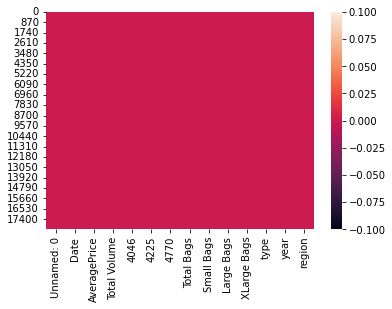

In [7]:
#To check missing values using heatmap
sns.heatmap(df_avacado.isnull())

In [8]:
#checking datatype and memory information
df_avacado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We see that there is no any missing values in our dataset.

There are 9 continuous features and 3 discrete(categorical) features.

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)

Uni variate analysis works with only one variable, hence it is called as uni variate.

### 1. Distplot

In [9]:
#list out columns which is having float or integer datatypes
features = df_avacado[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 
                       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

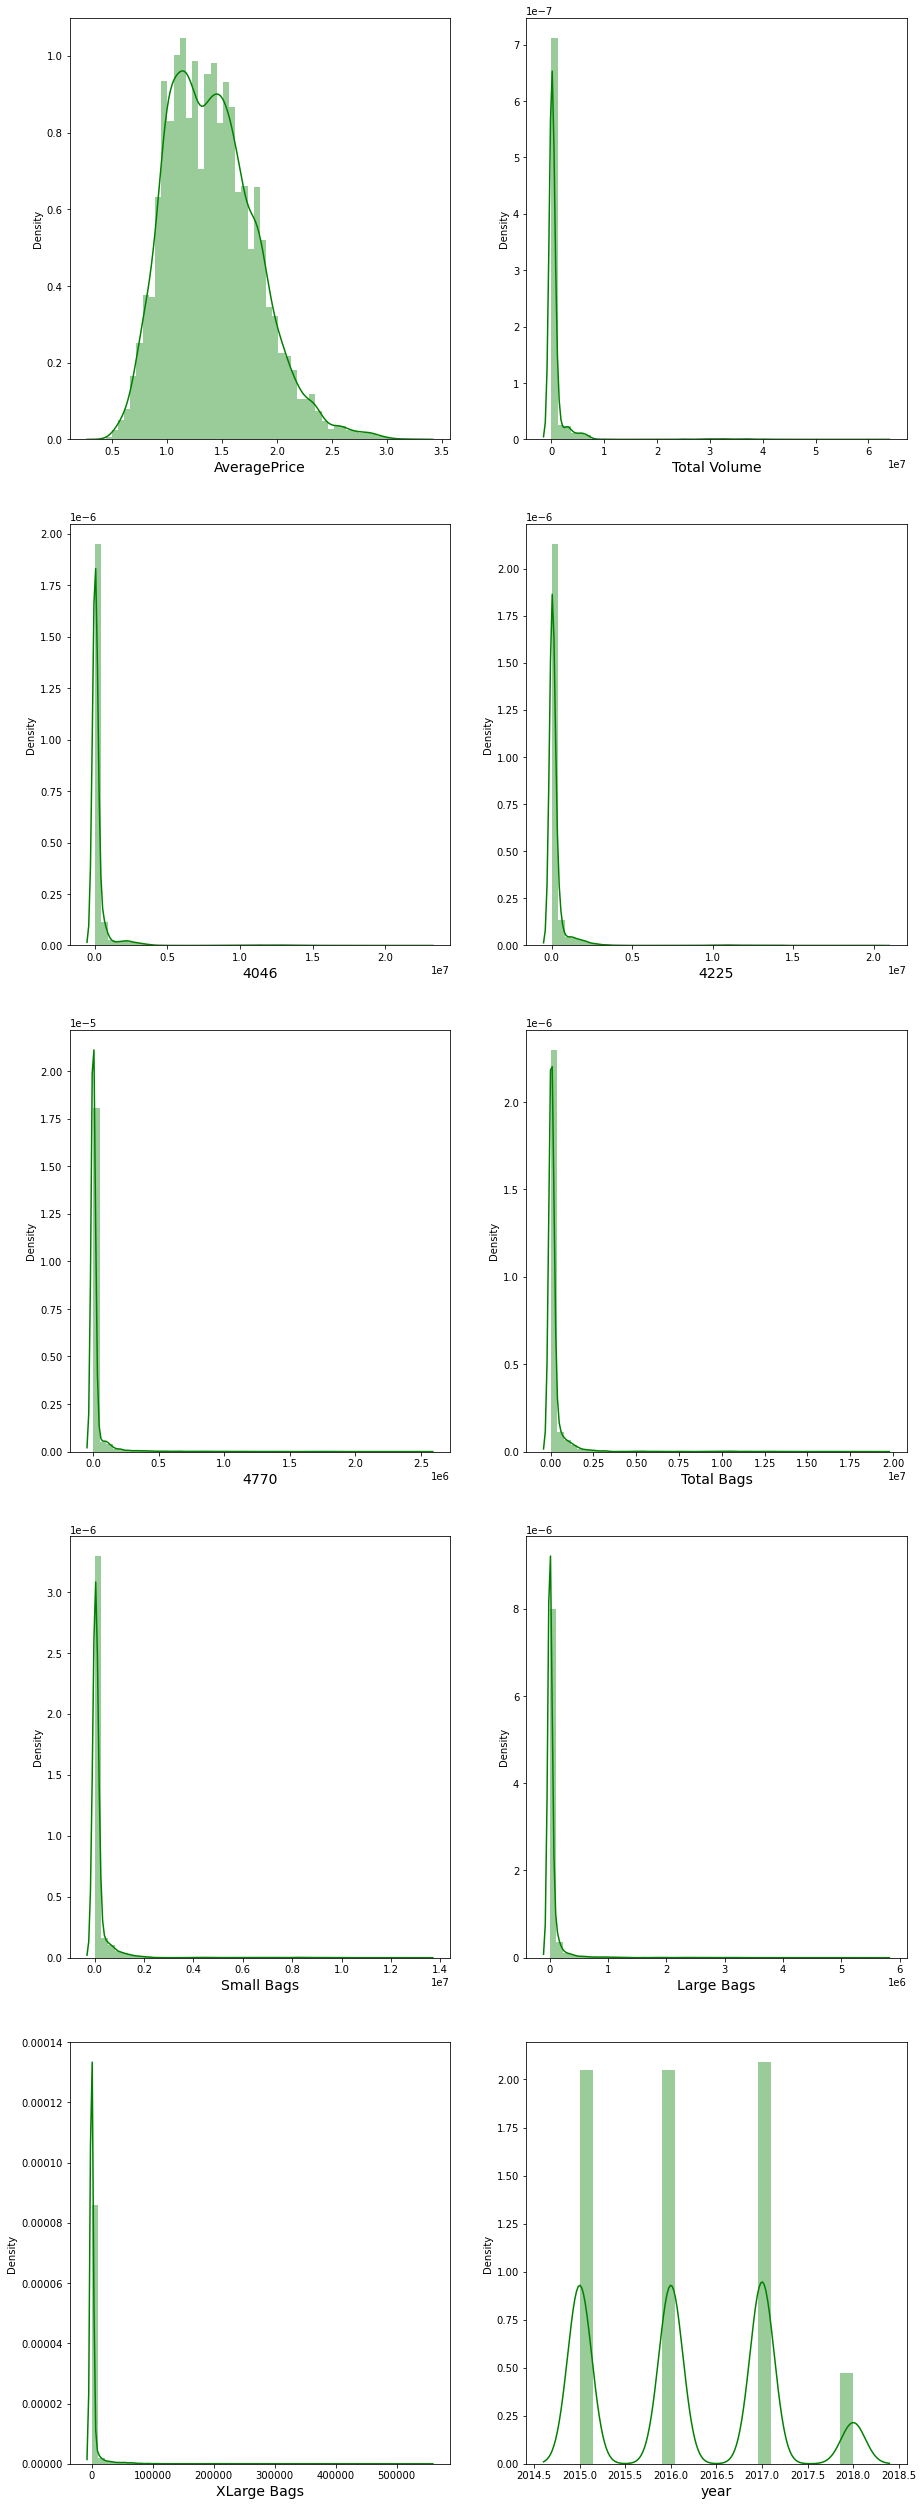

In [10]:
#Relationship Visualizing using distribution plots

plt.figure(figsize = (15,45))
plot_number = 1

for i in features:
    if plot_number <= 11: 
        plt.subplot(5,2,plot_number)
        sns.distplot(features[i], color = 'g')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

From the above distribution plots, we can see that
1. Average Price column is normally distributed
2. Total Volume colum is not normally distributed
3. 4046 column is not normally distributed
4. 4245 column is not normally distributed
5. 4770 column is not normally distributed
6. Total Bags column is not normally distributed
7. Small Bags column is not normally distributed
8. Large Bags column is not normally distributed
9. XLarge Bags column is not normally distributed
10. year column is not normally distributed

### 2. Kdeplot

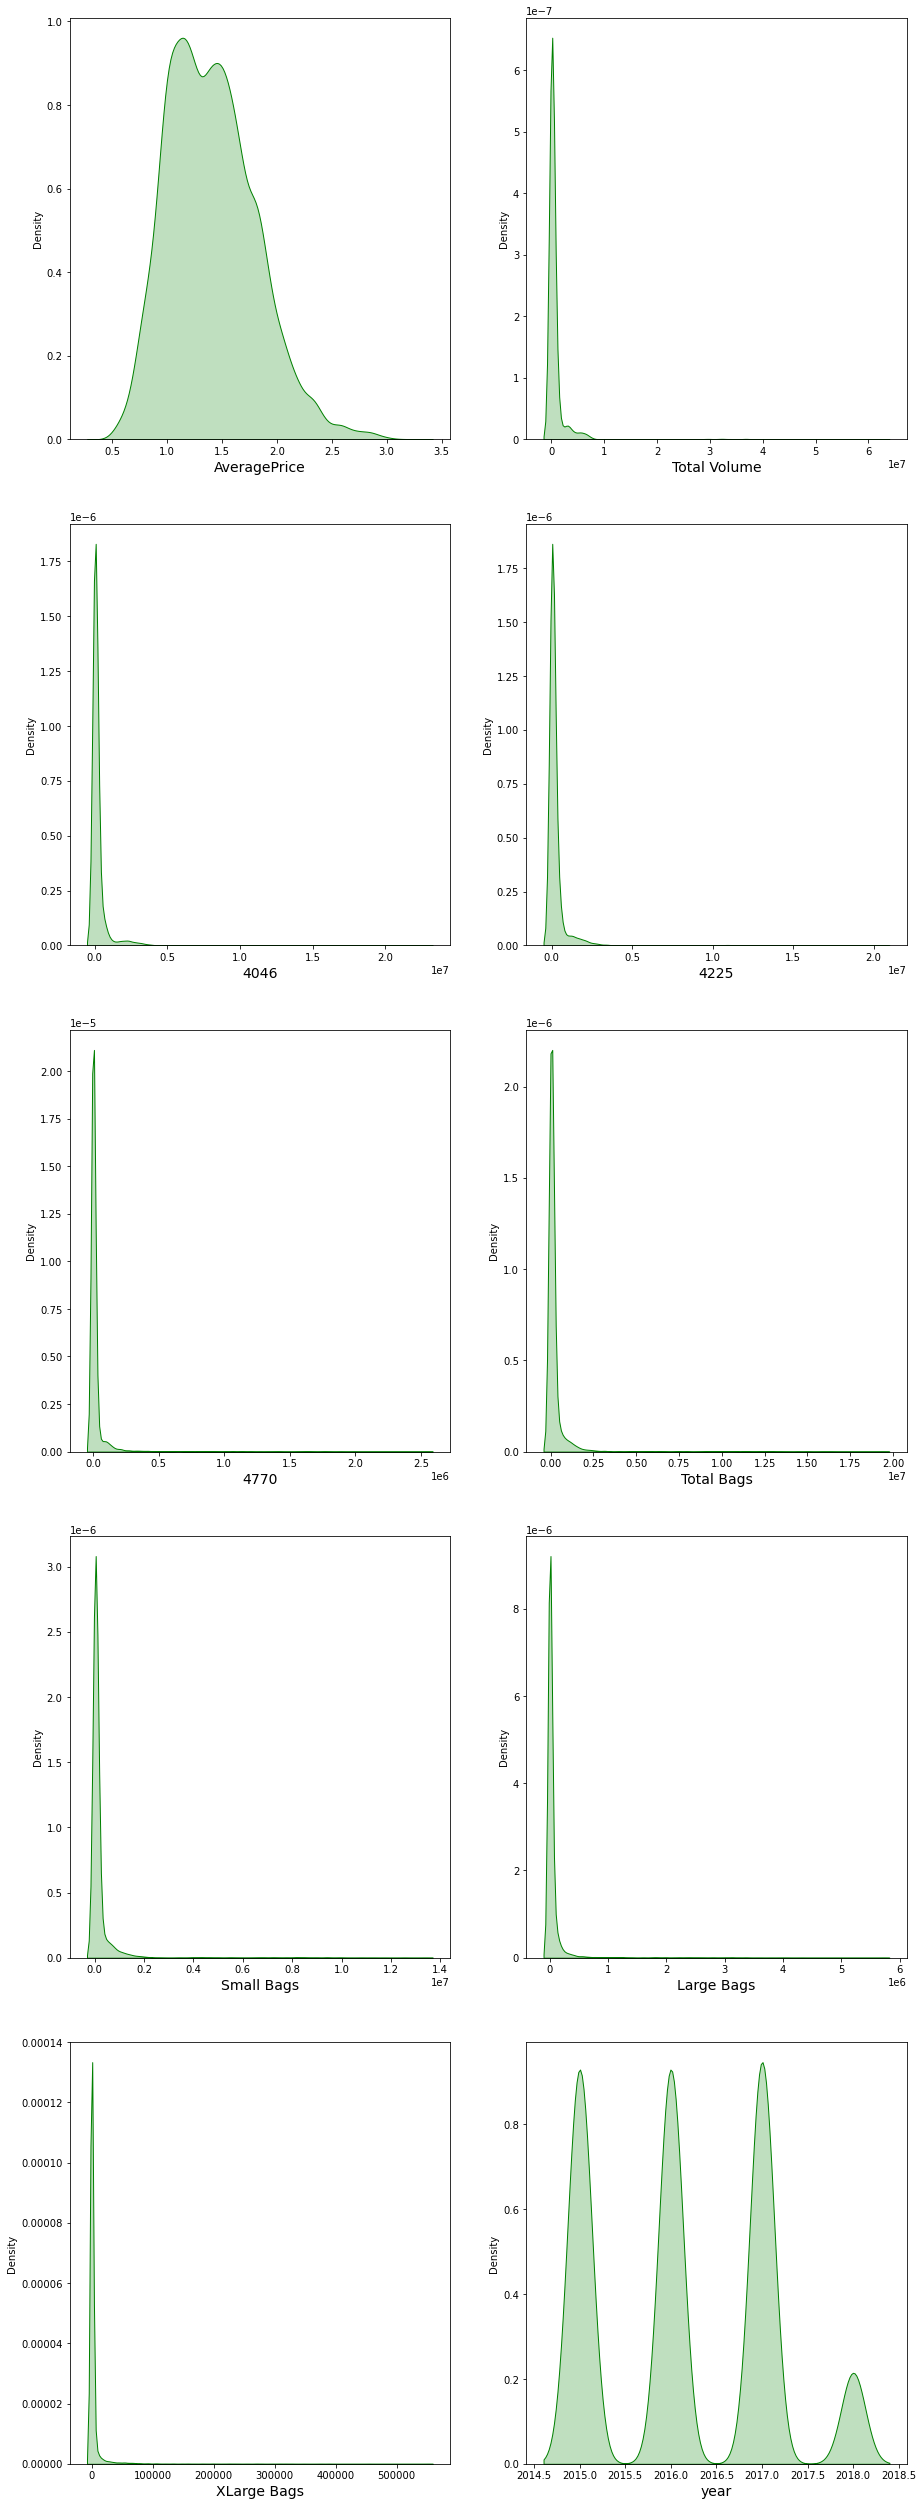

In [11]:
#Relationship Visualizing using kde plots

plt.figure(figsize = (15,45))
plot_number = 1

for i in features:
    if plot_number <= 11: 
        plt.subplot(5,2,plot_number)
        sns.kdeplot(features[i], color = 'g', fill=True)
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

From above plots of various columns, we can see that

1. Total Volume column is having highly skewed data.
2. 4046 column is having skewed data.
3. 4225 column is having skewed data.
4. 4770 column is having highly skewed data.
5. Total Bags column is having highly skewed data.
6. Small Bags column is having highly skewed data.
7. Large Bags column is having slightly skewed data.
8. XLarge Bags column is having slightly skewed data.
9. year column is having highly skewed data.

### 3. Lineplot

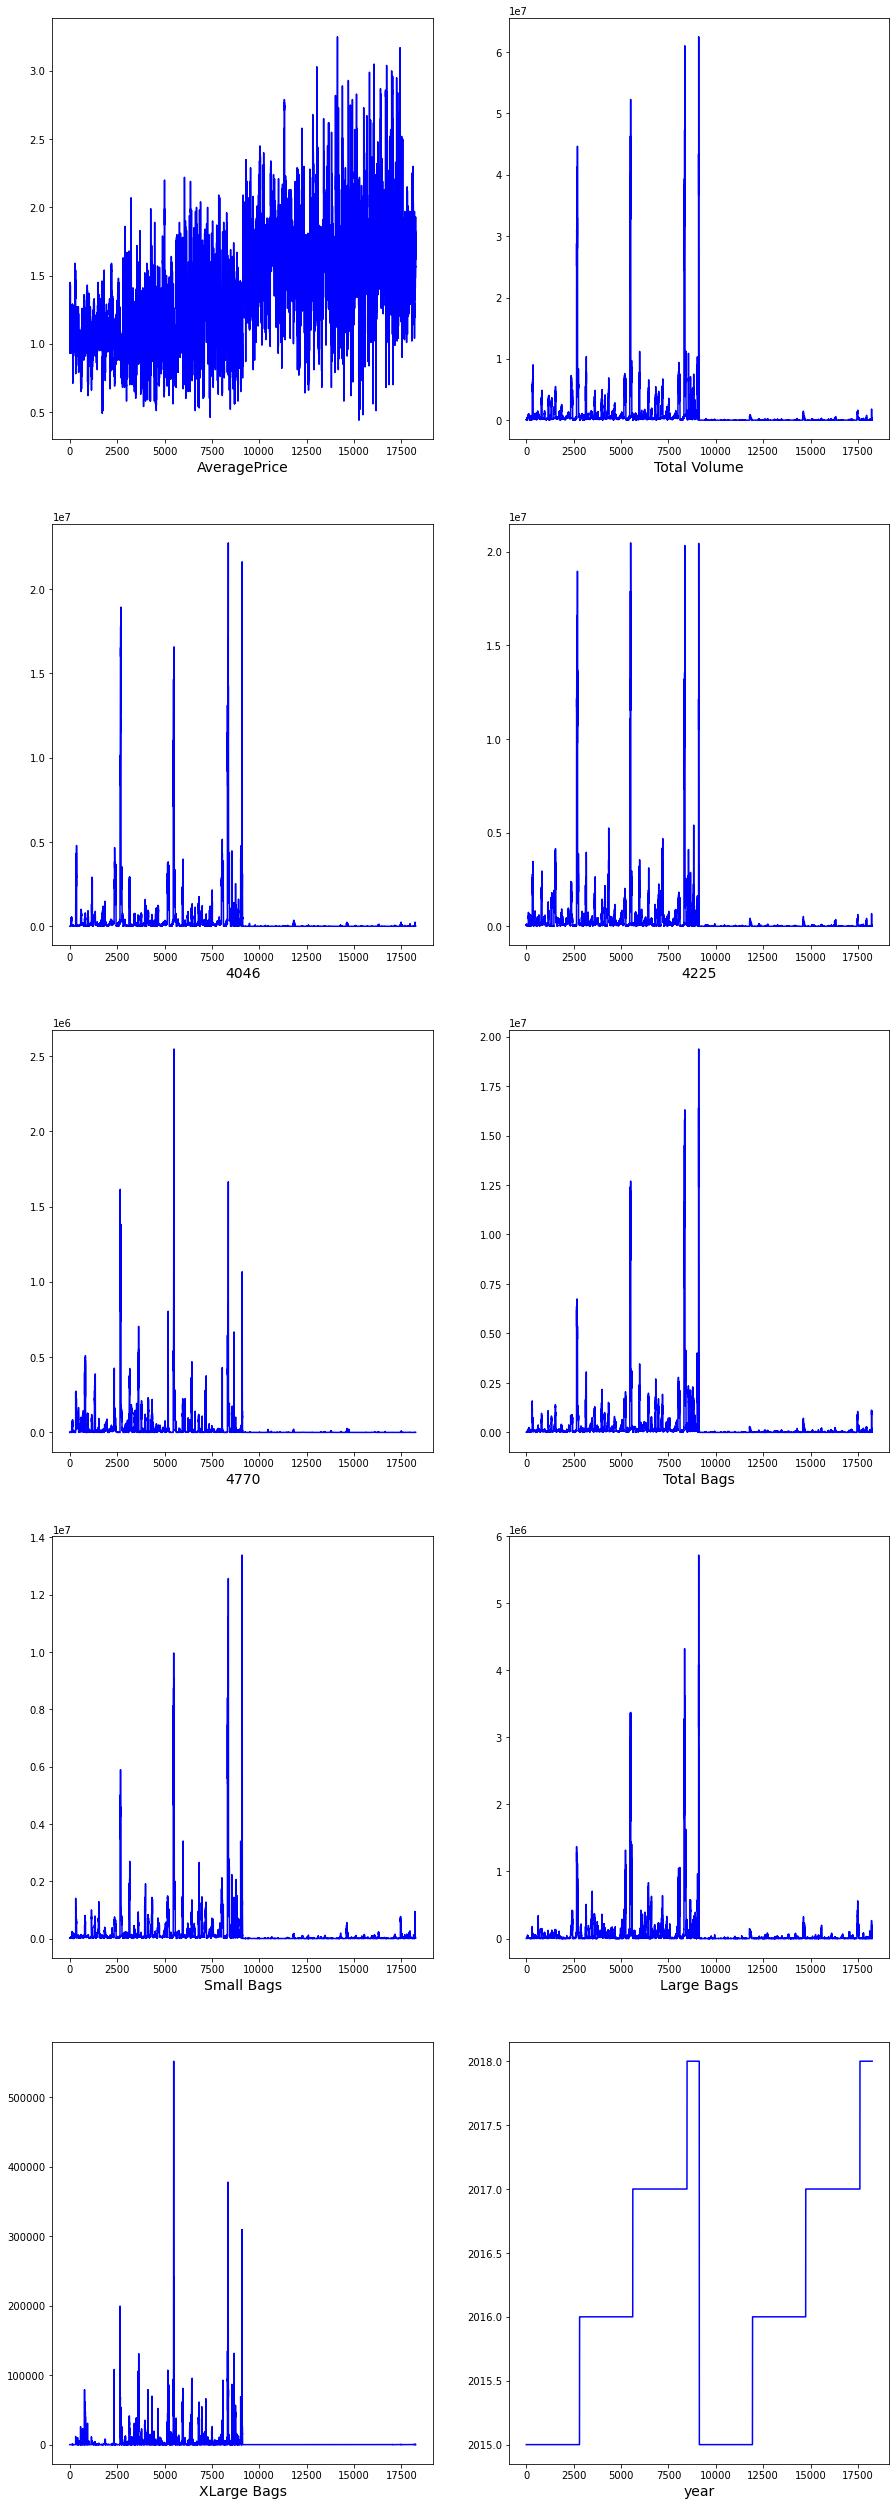

In [12]:
#Relationship Visualizing using lineplot

plt.figure(figsize = (15,45))
plot_number = 1

for i in features:
    if plot_number <= 11: 
        plt.subplot(5,2,plot_number)
        plt.plot(features[i], color = 'b')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()


From the above observations of lineplots, we can see that any of the columns are not stationary.

### 4. Boxplot

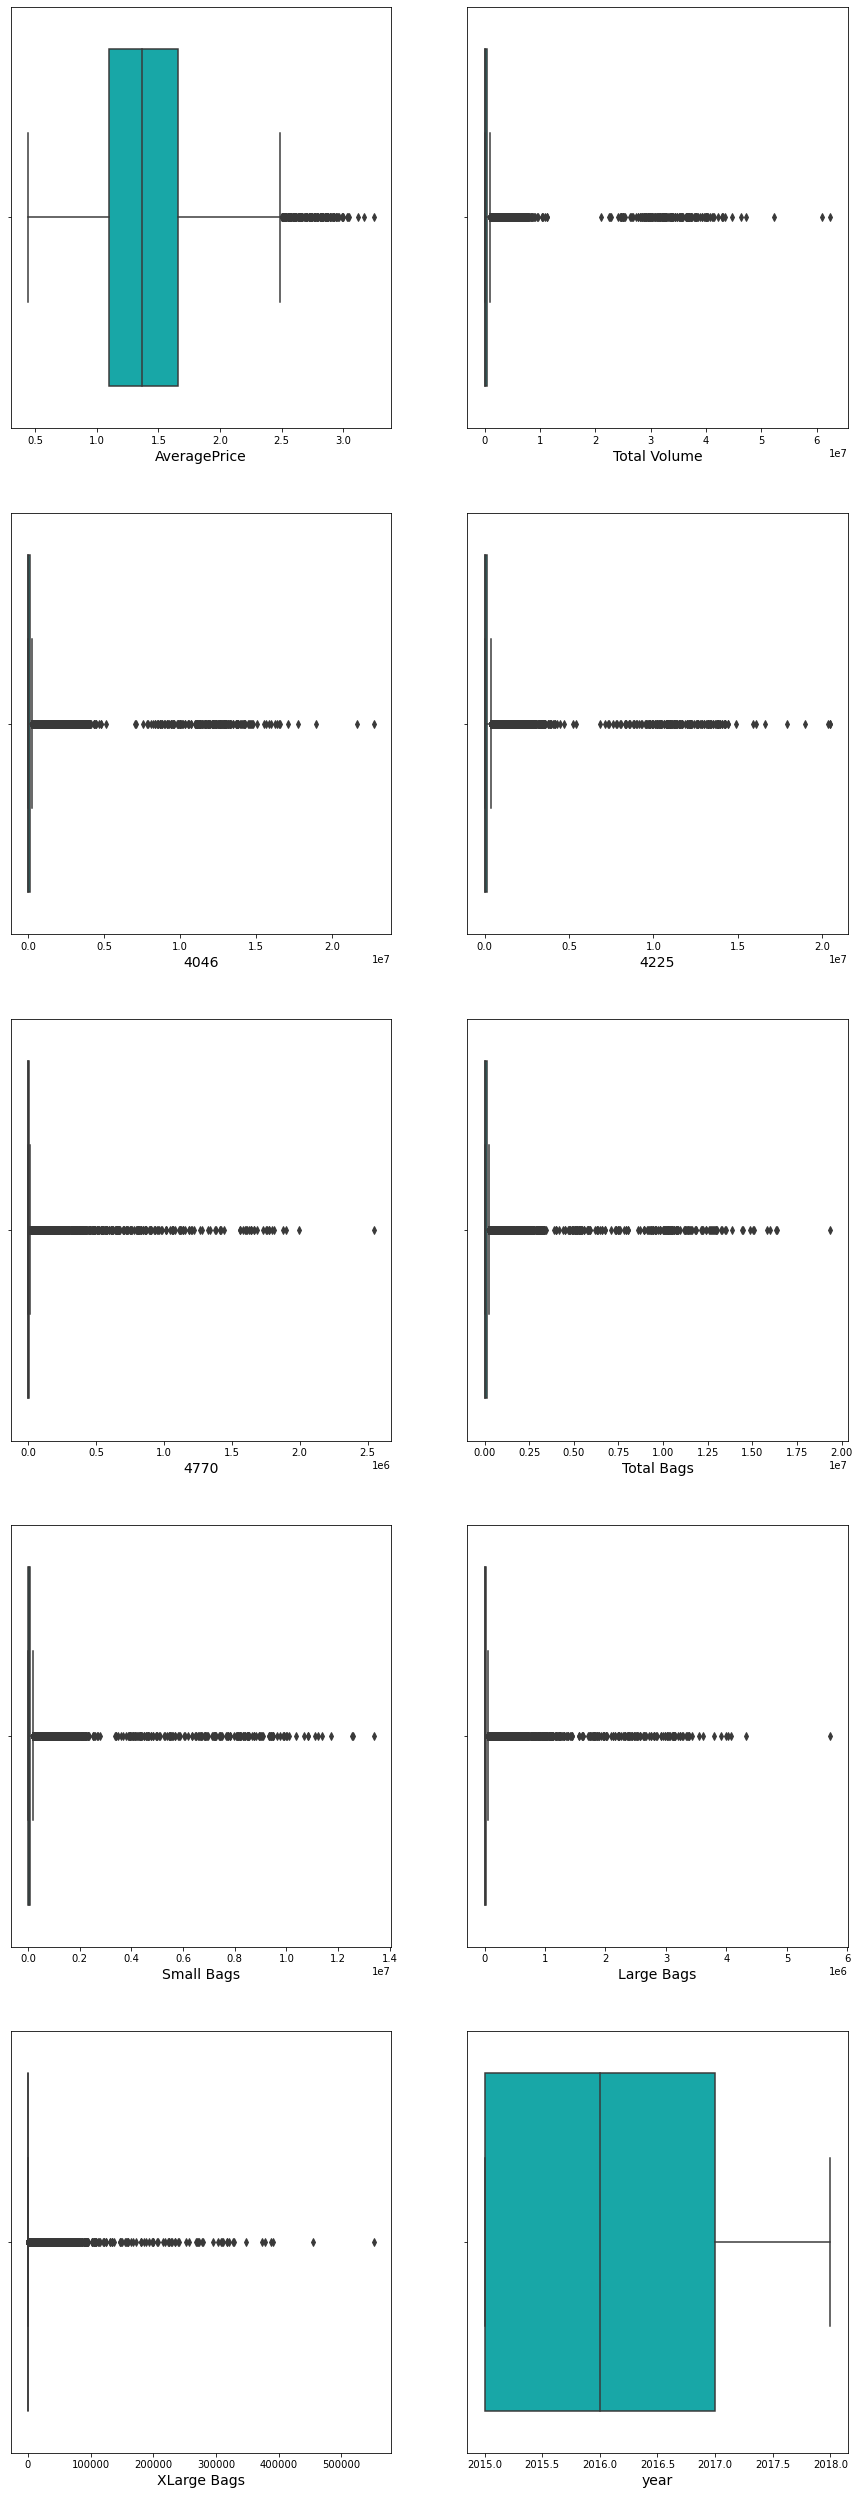

In [13]:
#Relationship Visualizing using boxplot

plt.figure(figsize = (15,45))
plot_number = 1

for i in features:
    if plot_number <= 11: 
        plt.subplot(5,2,plot_number)
        sns.boxplot(features[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

As we can see in boxplot, all the columns except 'year' column have outliers in it. So need to remove the outliers first.

### 5. Stripplot

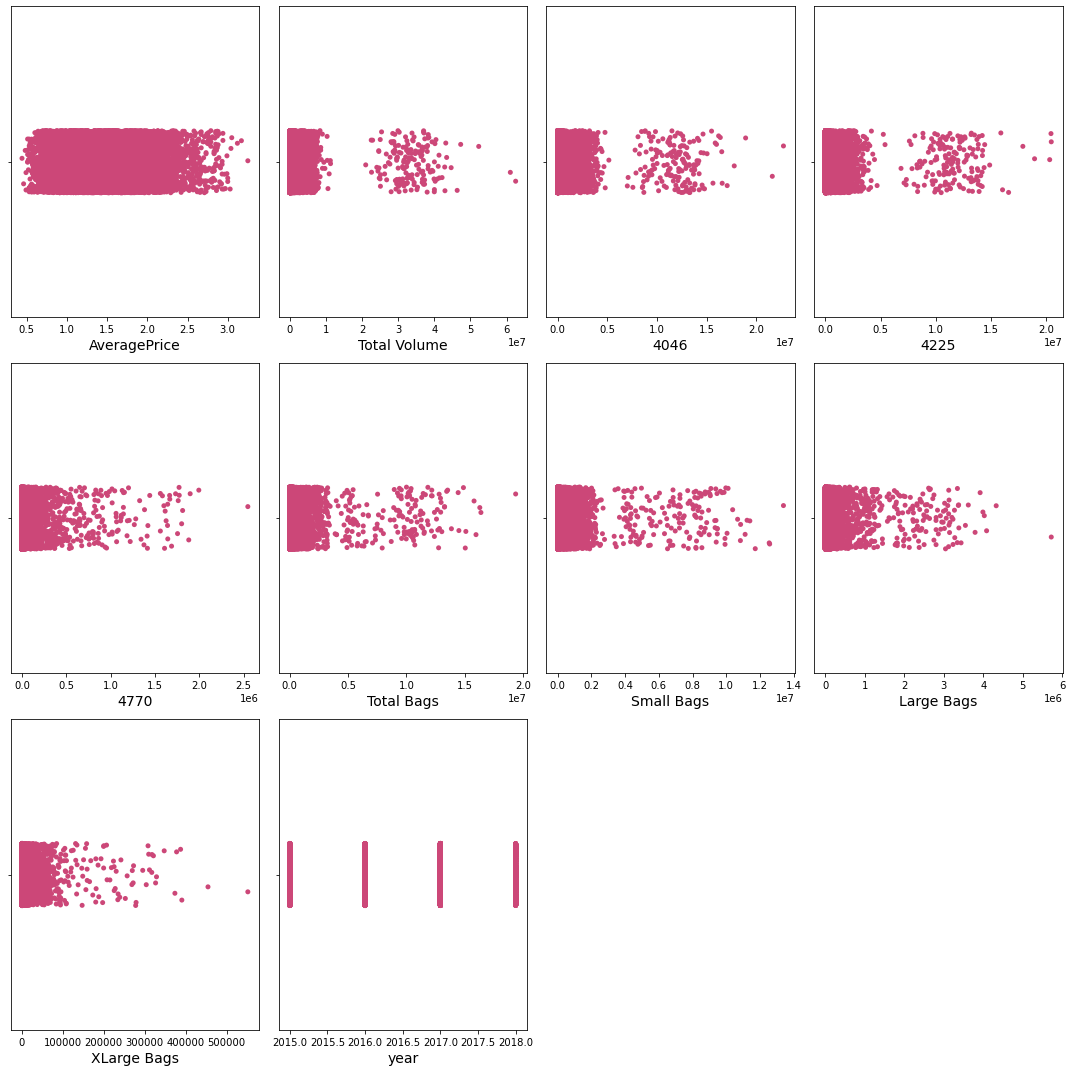

In [14]:
#Relationship Visualizing using stripplot

plt.figure(figsize = (15,15))
plot_number = 1

for i in features:
    if plot_number <= 11: 
        plt.subplot(3,4,plot_number)
        sns.stripplot(features[i], palette="plasma")
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1    
plt.tight_layout()

The above strip plot shows the data point distribution across the dataset and it's range details. We can also see that all the columns with single data points far away from the general accumulation indicating towards the presence of ouliers.

### 6. Countplot

conventional    9126
organic         9123
Name: type, dtype: int64

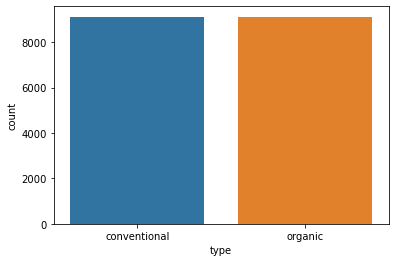

In [15]:
#categorical data column
sns.countplot(df_avacado["type"])
df_avacado["type"].value_counts()

There are only two unique values in "type" column.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

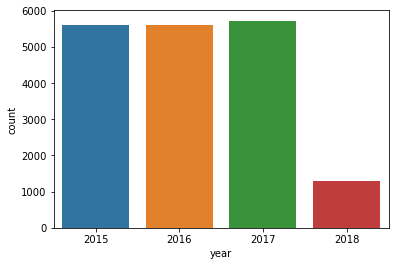

In [16]:
#categorical data column
sns.countplot(df_avacado["year"])
df_avacado["year"].value_counts()

There are details of only 4 years in the "year" column. 

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

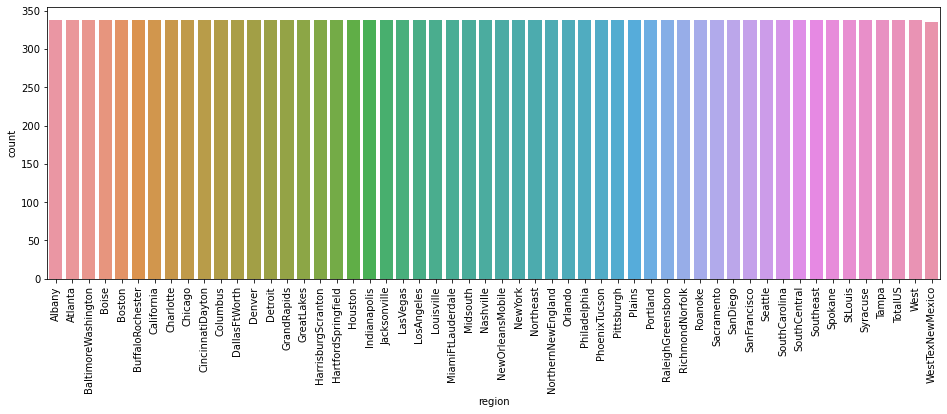

In [17]:
#categorical data column
plt.figure(figsize = (16,5))
sns.countplot(df_avacado["region"])
plt.xticks(rotation=90)
df_avacado["region"].value_counts()

There are 54 unique city values in "region" column.

### Bi variate analysis

Bi variate analysis works with two variables.

### Scatterplot

In [18]:
#list out columns which is having float or integer datatypes
features = df_avacado[['Total Volume', '4046', '4225', '4770', 
                       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

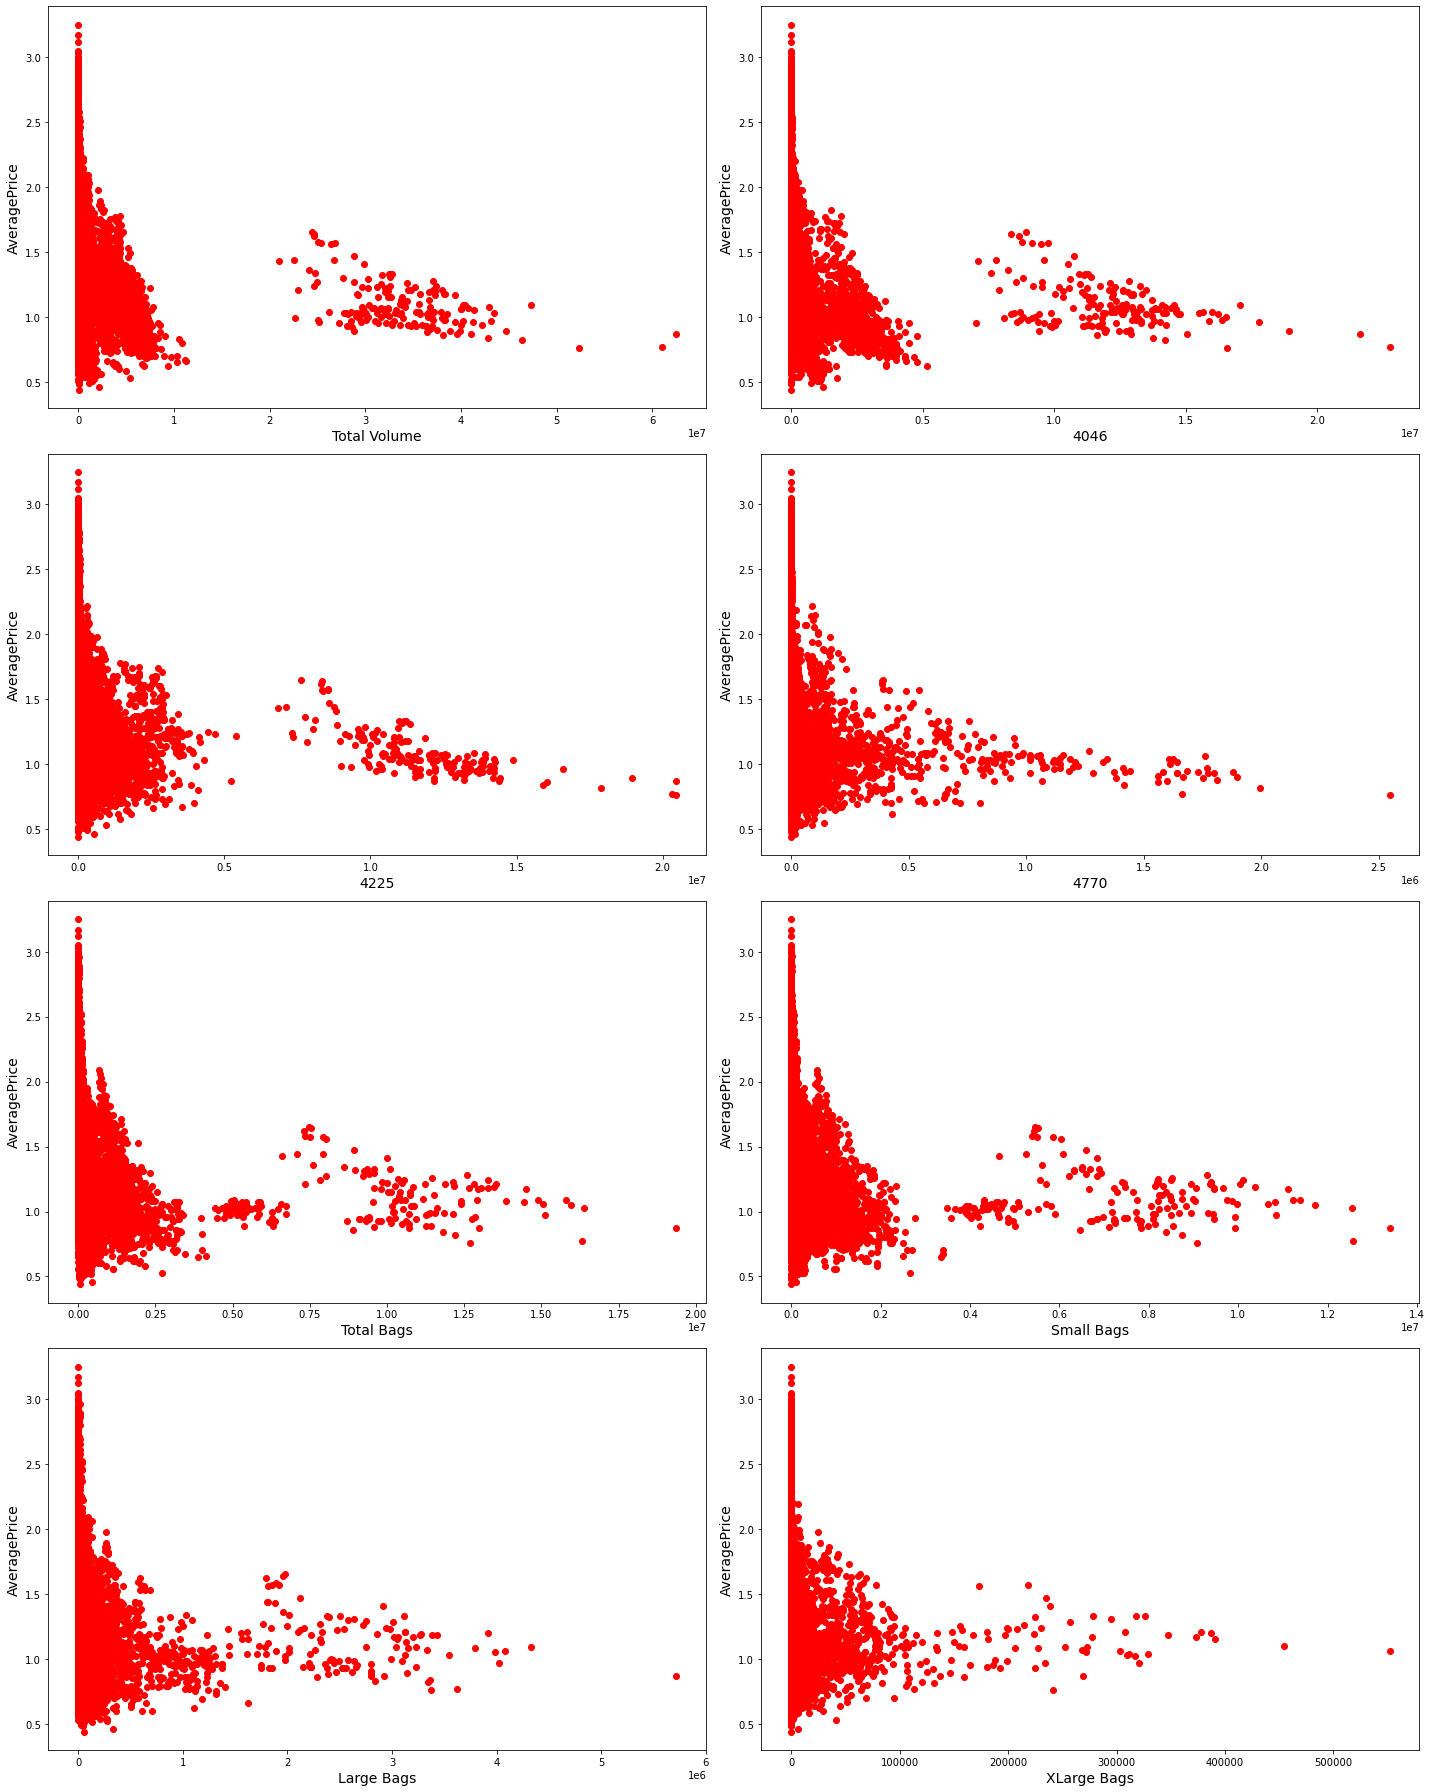

In [19]:
#Relationship Visualizing using scatterplot

plt.figure(figsize = (20,25))
plot_number = 1

for i in features:
    if plot_number <= 9:
        plt.subplot(4,2,plot_number)
        plt.scatter(features[i],df_avacado['AveragePrice'], color='r')
        plt.xlabel(i,fontsize=14)
        plt.ylabel('AveragePrice', fontsize=14)
    plot_number += 1
plt.tight_layout()


The above scatterplots shows that,

1. Most of the Average Price lies between (0 to 0.7)x1e7 of Total Volume.
2. Most of the average price (from 0.2 to 1.9) lies between (0 to 0.6)x1e7 of 4046 column.
3. Most of the Average Price (from 0.1 to 1.9) lies between (0 to 0.4)x1e7 of 4225 column.
4. Most of the Average Price (from 0.2 to 1.7) lies between (0 to 0.6)x1e6 of 4770 column.
5. Most of the Average Price (from 0.2 to 1.6) lies between (0 to 0.4)x1e7 of Total Bags.
6. Most of the Average Price (from 0.2 to 1.8) lies between (0 to 0.25)x1e7 of Small Bags.
7. Most of the Average Price (from 0.2 to 1.6) lies between (0 to 1.6)x1e6 of Large Bags.
8. Most of the Average Price (from 0.2 to 2.0) lies between (0 to 200000) of XLarge Bags.

<Figure size 1440x720 with 0 Axes>

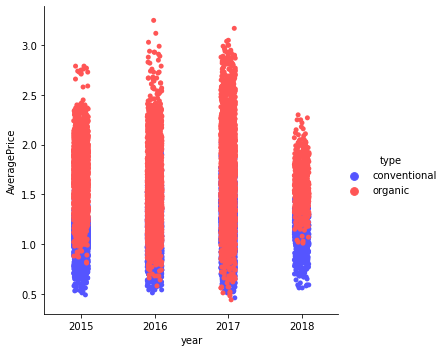

In [20]:
#Checking average price in years with different types
plt.figure(figsize=(20,10))
sns.catplot(x="year", y="AveragePrice", hue="type", data=df_avacado, palette="seismic")
plt.show()

This plot shows that Average Price of organic products are higher than the conventional products.

<Figure size 1440x720 with 0 Axes>

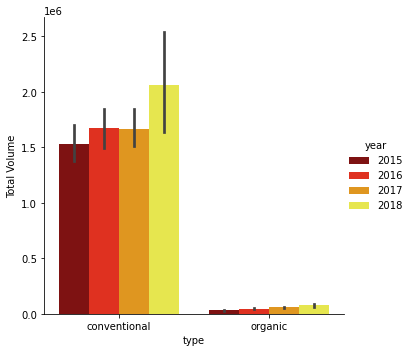

In [21]:
#checking total volume of product sold in different years
plt.figure(figsize=(20,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df_avacado, palette="hot")
plt.show()

In the above bar plot, we see that the Total Volume for conventional type was high in all 4 years as compared to organic type.

<Figure size 1080x720 with 0 Axes>

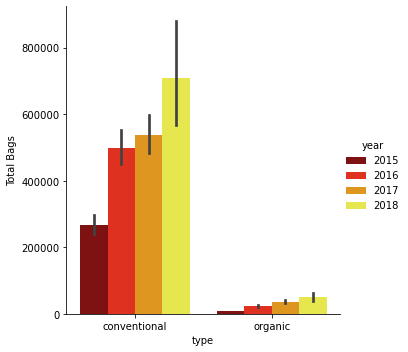

In [22]:
#checking Total Bags used per year w.r.t the type of avocados using barplot
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df_avacado, kind="bar", palette="hot")
plt.show()

In the above bar plot,we see that as the Total Volume sold was always high for conventional types hence, the usage of bags was higher for conventional type over the organic ones.

### Lineplot

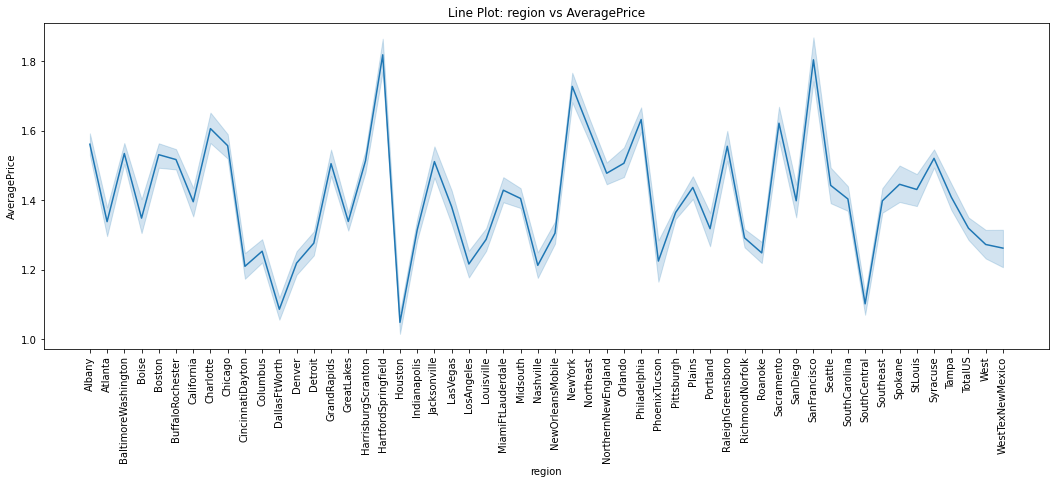

In [23]:
#Checking relationship between Region and Average Price using lineplot
x='region'
y='AveragePrice'
plt.figure(figsize=(18,6))
sns.lineplot(x,y,data=df_avacado)
plt.title(f'Line Plot: {x} vs {y}')
plt.xticks(rotation=90)
plt.show()

The plot shows that 
Average Price is maximum in HartfordSpringfield.
Average Price is lowest in Houston.

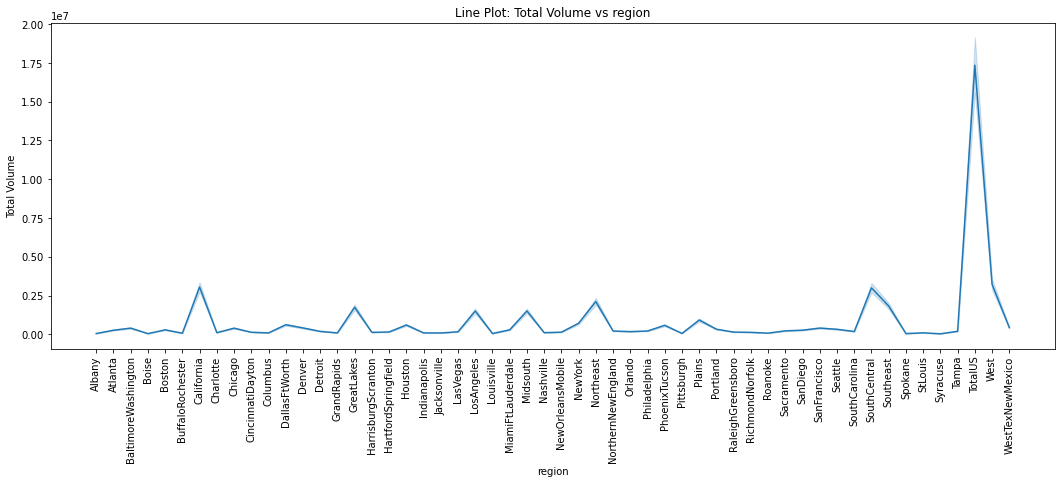

In [24]:
#Checking relationship between Total Volume and Region using lineplot
x='Total Volume'
y='region'
plt.figure(figsize=(18,6))
sns.lineplot(y,x,data=df_avacado)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Total Volume is highest in the region TotalUS and Most of the Region have a similar Total Volume.

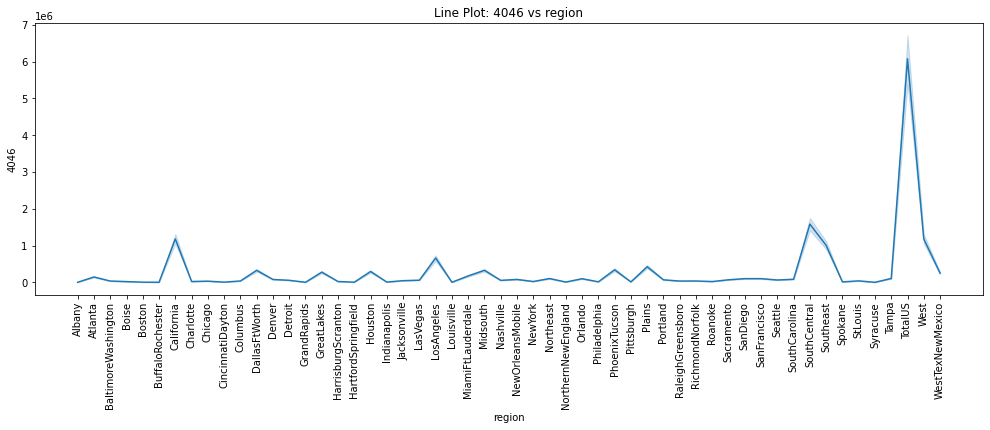

In [25]:
#Checking relationship between 4046 and Region using lineplot
x='4046'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df_avacado)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

4046 is maximum in region TotalUS and in other most of the region it is almost equal.

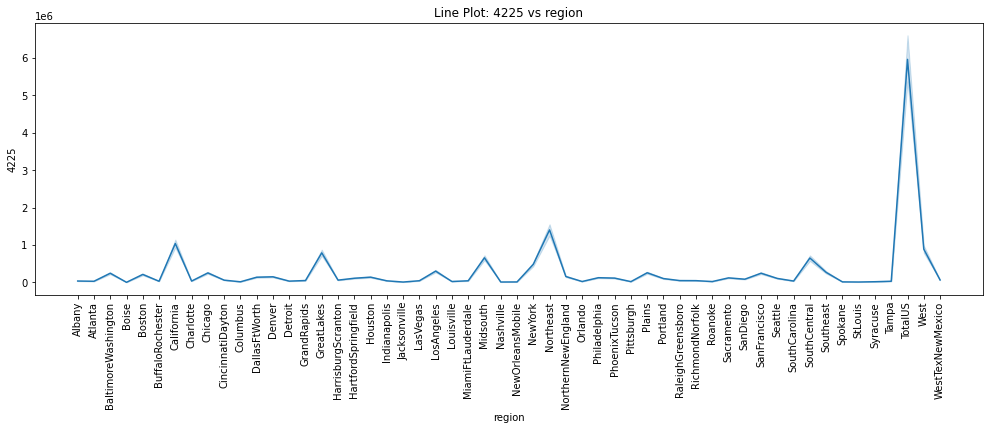

In [26]:
#Checking relationship between 4225 and Region using lineplot
x='4225'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df_avacado)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

4225 is maximum in Region TotalUS and in other most of the Region it is almost similar.

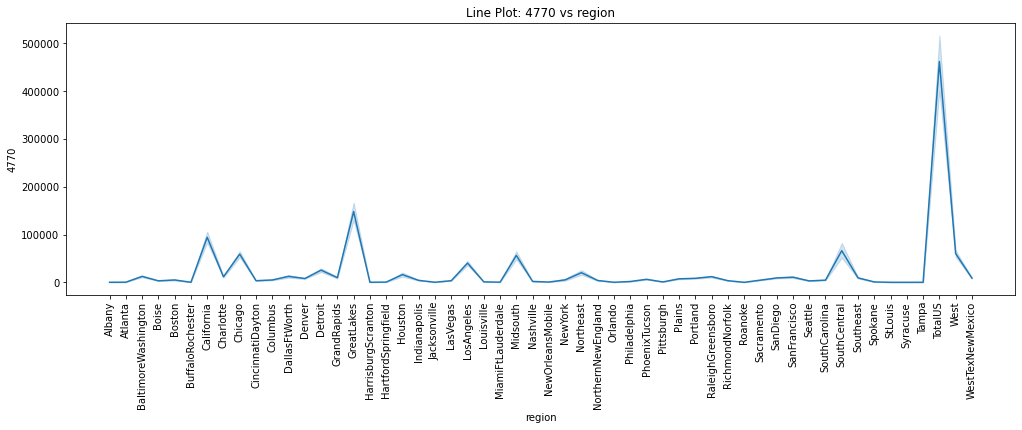

In [27]:
#Checking relationship between 4770 and Region using lineplot
x='4770'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df_avacado)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

4770 is highest in Region TotalUS and it is almost similar in other most of the Region except for California, GreatLakes, Midsouth and SouthCentral.

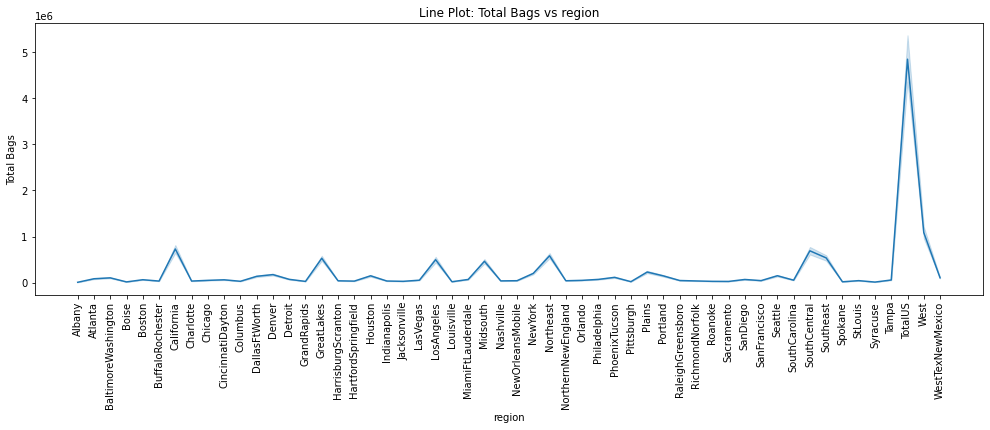

In [28]:
#Checking relationship between Total Bags and Region using lineplot
x='Total Bags'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df_avacado)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Total Bags is highest in the region TotalUS. Total Bags are similar in most of the Region except for California, GreatLakes, Northeast and SouthCentral.

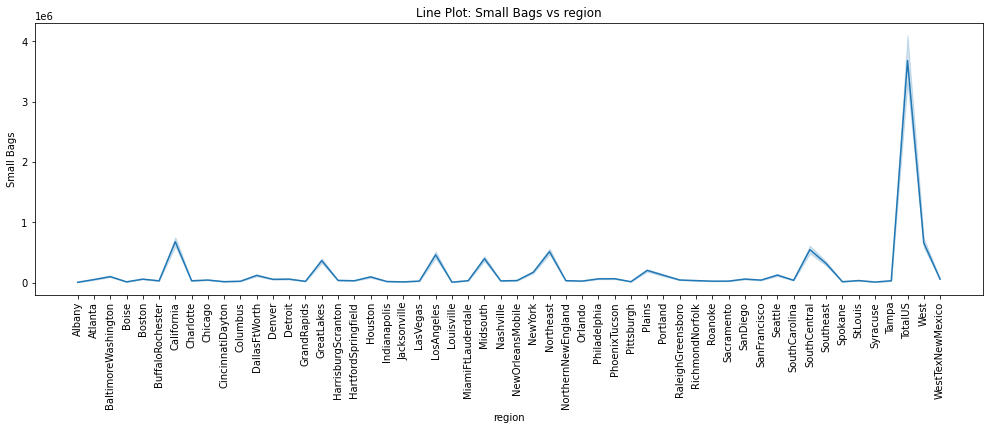

In [29]:
#Checking relationship between Small Bags and Region using lineplot
x='Small Bags'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df_avacado)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Small Bags is highest in region TotalUS and they are similar in most of the Region except for California, GreatLakes, Midsouth, Northeast and SouthCentral.

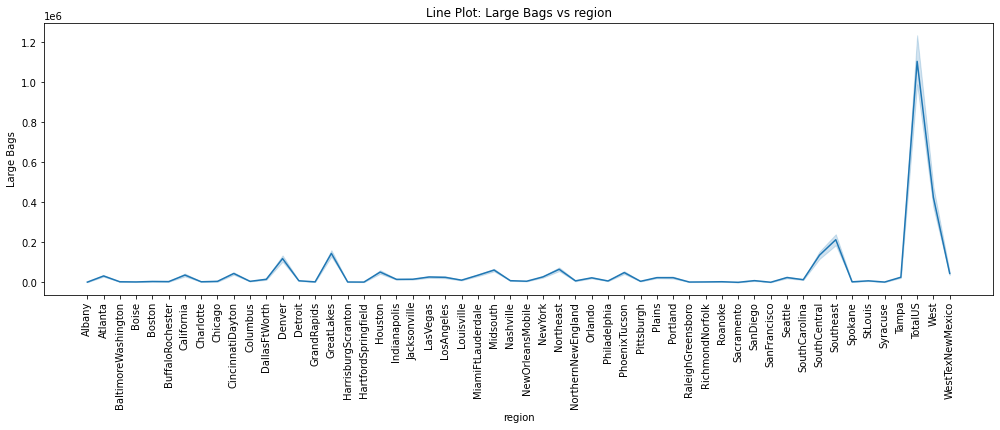

In [30]:
#Checking relationship between Large Bags and Region using lineplot
x='Large Bags'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df_avacado)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

Large Bags is highest in TotalUS and it is almost similar in most of the Region except for Denver, GreatLakes, and Southeast.

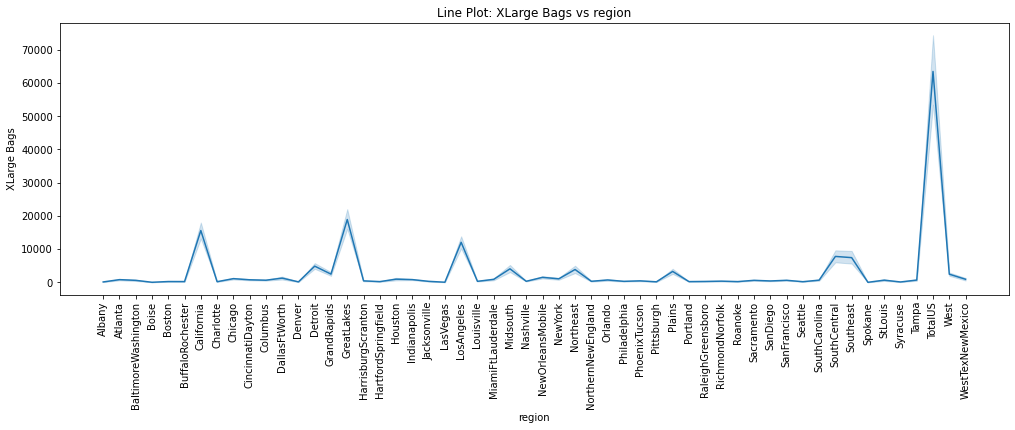

In [31]:
#Checking relationship between Xlarge Bags and Region using lineplot
x='XLarge Bags'
y='region'
plt.figure(figsize=(17,5))
sns.lineplot(y,x,data=df_avacado)
plt.title(f"Line Plot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

XLarge Bags is highest in TotalUS and it is almost similar in most of the Region except for California, GreatLakes, LosAngeles and SouthCentral.

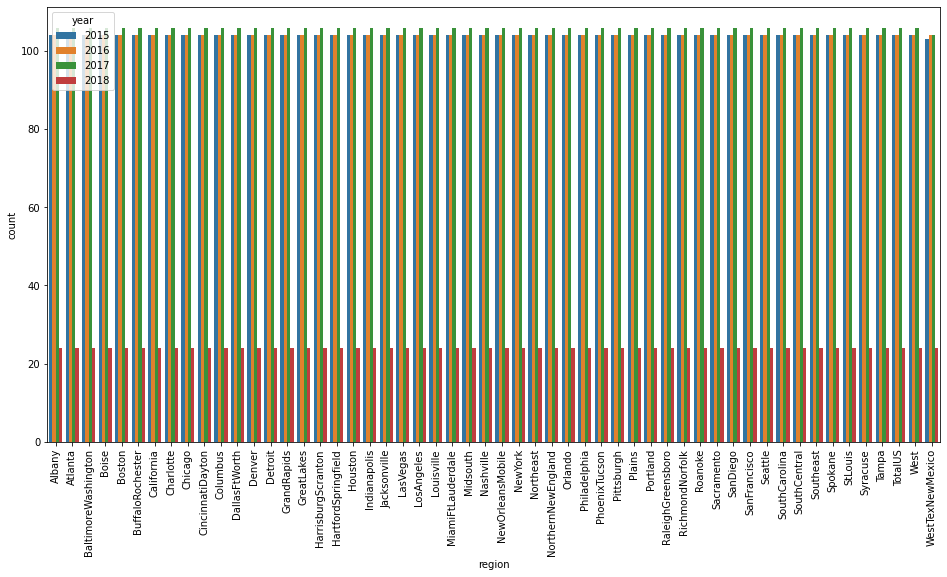

In [32]:
#Checking relationship between Year and Region using countplot
plt.figure(figsize=(16,8))
sns.countplot('region',hue='year',data=df_avacado)
plt.xticks(rotation=90)
plt.show()

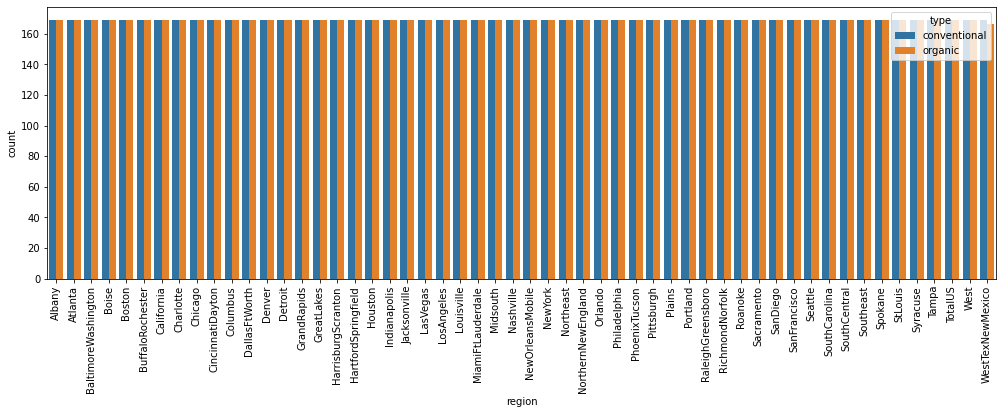

In [34]:
#Checking relationship between type and Region using countplot
plt.figure(figsize=(17,5))
sns.countplot('region',hue='type',data=df_avacado)
plt.xticks(rotation=90)
plt.show()

This shows that both conventional and organic type of avocados were sold in all region in almost equal amount except for WestTexasNewMexico region.

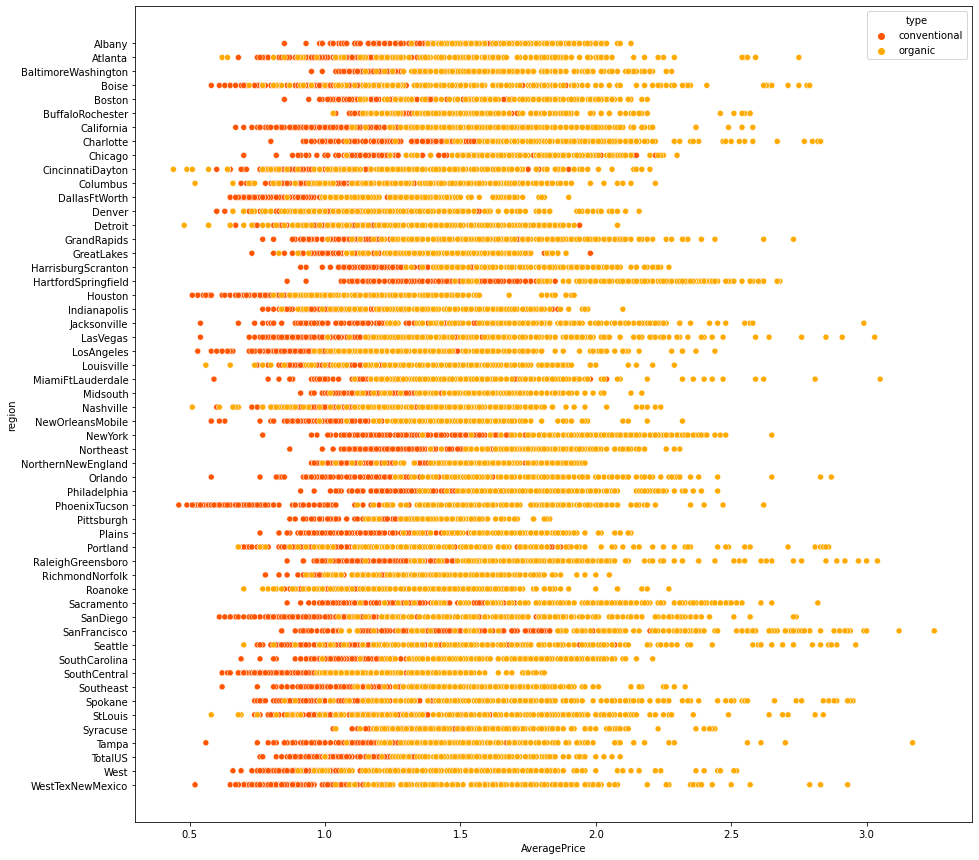

In [35]:
#checking scatter plot for average price per region w.r.t the type of avocados
plt.figure(figsize=(15,15))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df_avacado, palette="autumn")
plt.show()

It shows that the organic type is priced way higher compared to the conventional type of avocados in all the regions.

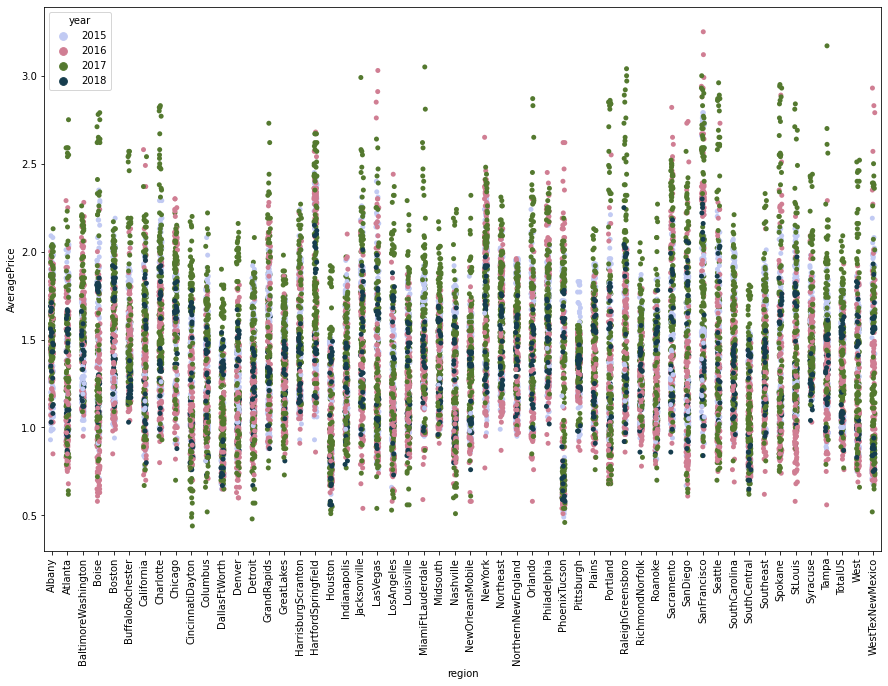

In [36]:
#checking scatterplot for average price per year w.r.t. the regions
plt.figure(figsize=(15,10))
sns.stripplot(x='region', y='AveragePrice', hue="year", data=df_avacado, palette="cubehelix_r")
plt.xticks(rotation=90)
plt.show()

It shows that in the year 2016 and 2017, the average prices were higher than in the year 2015 and 2018.

### Pairplot

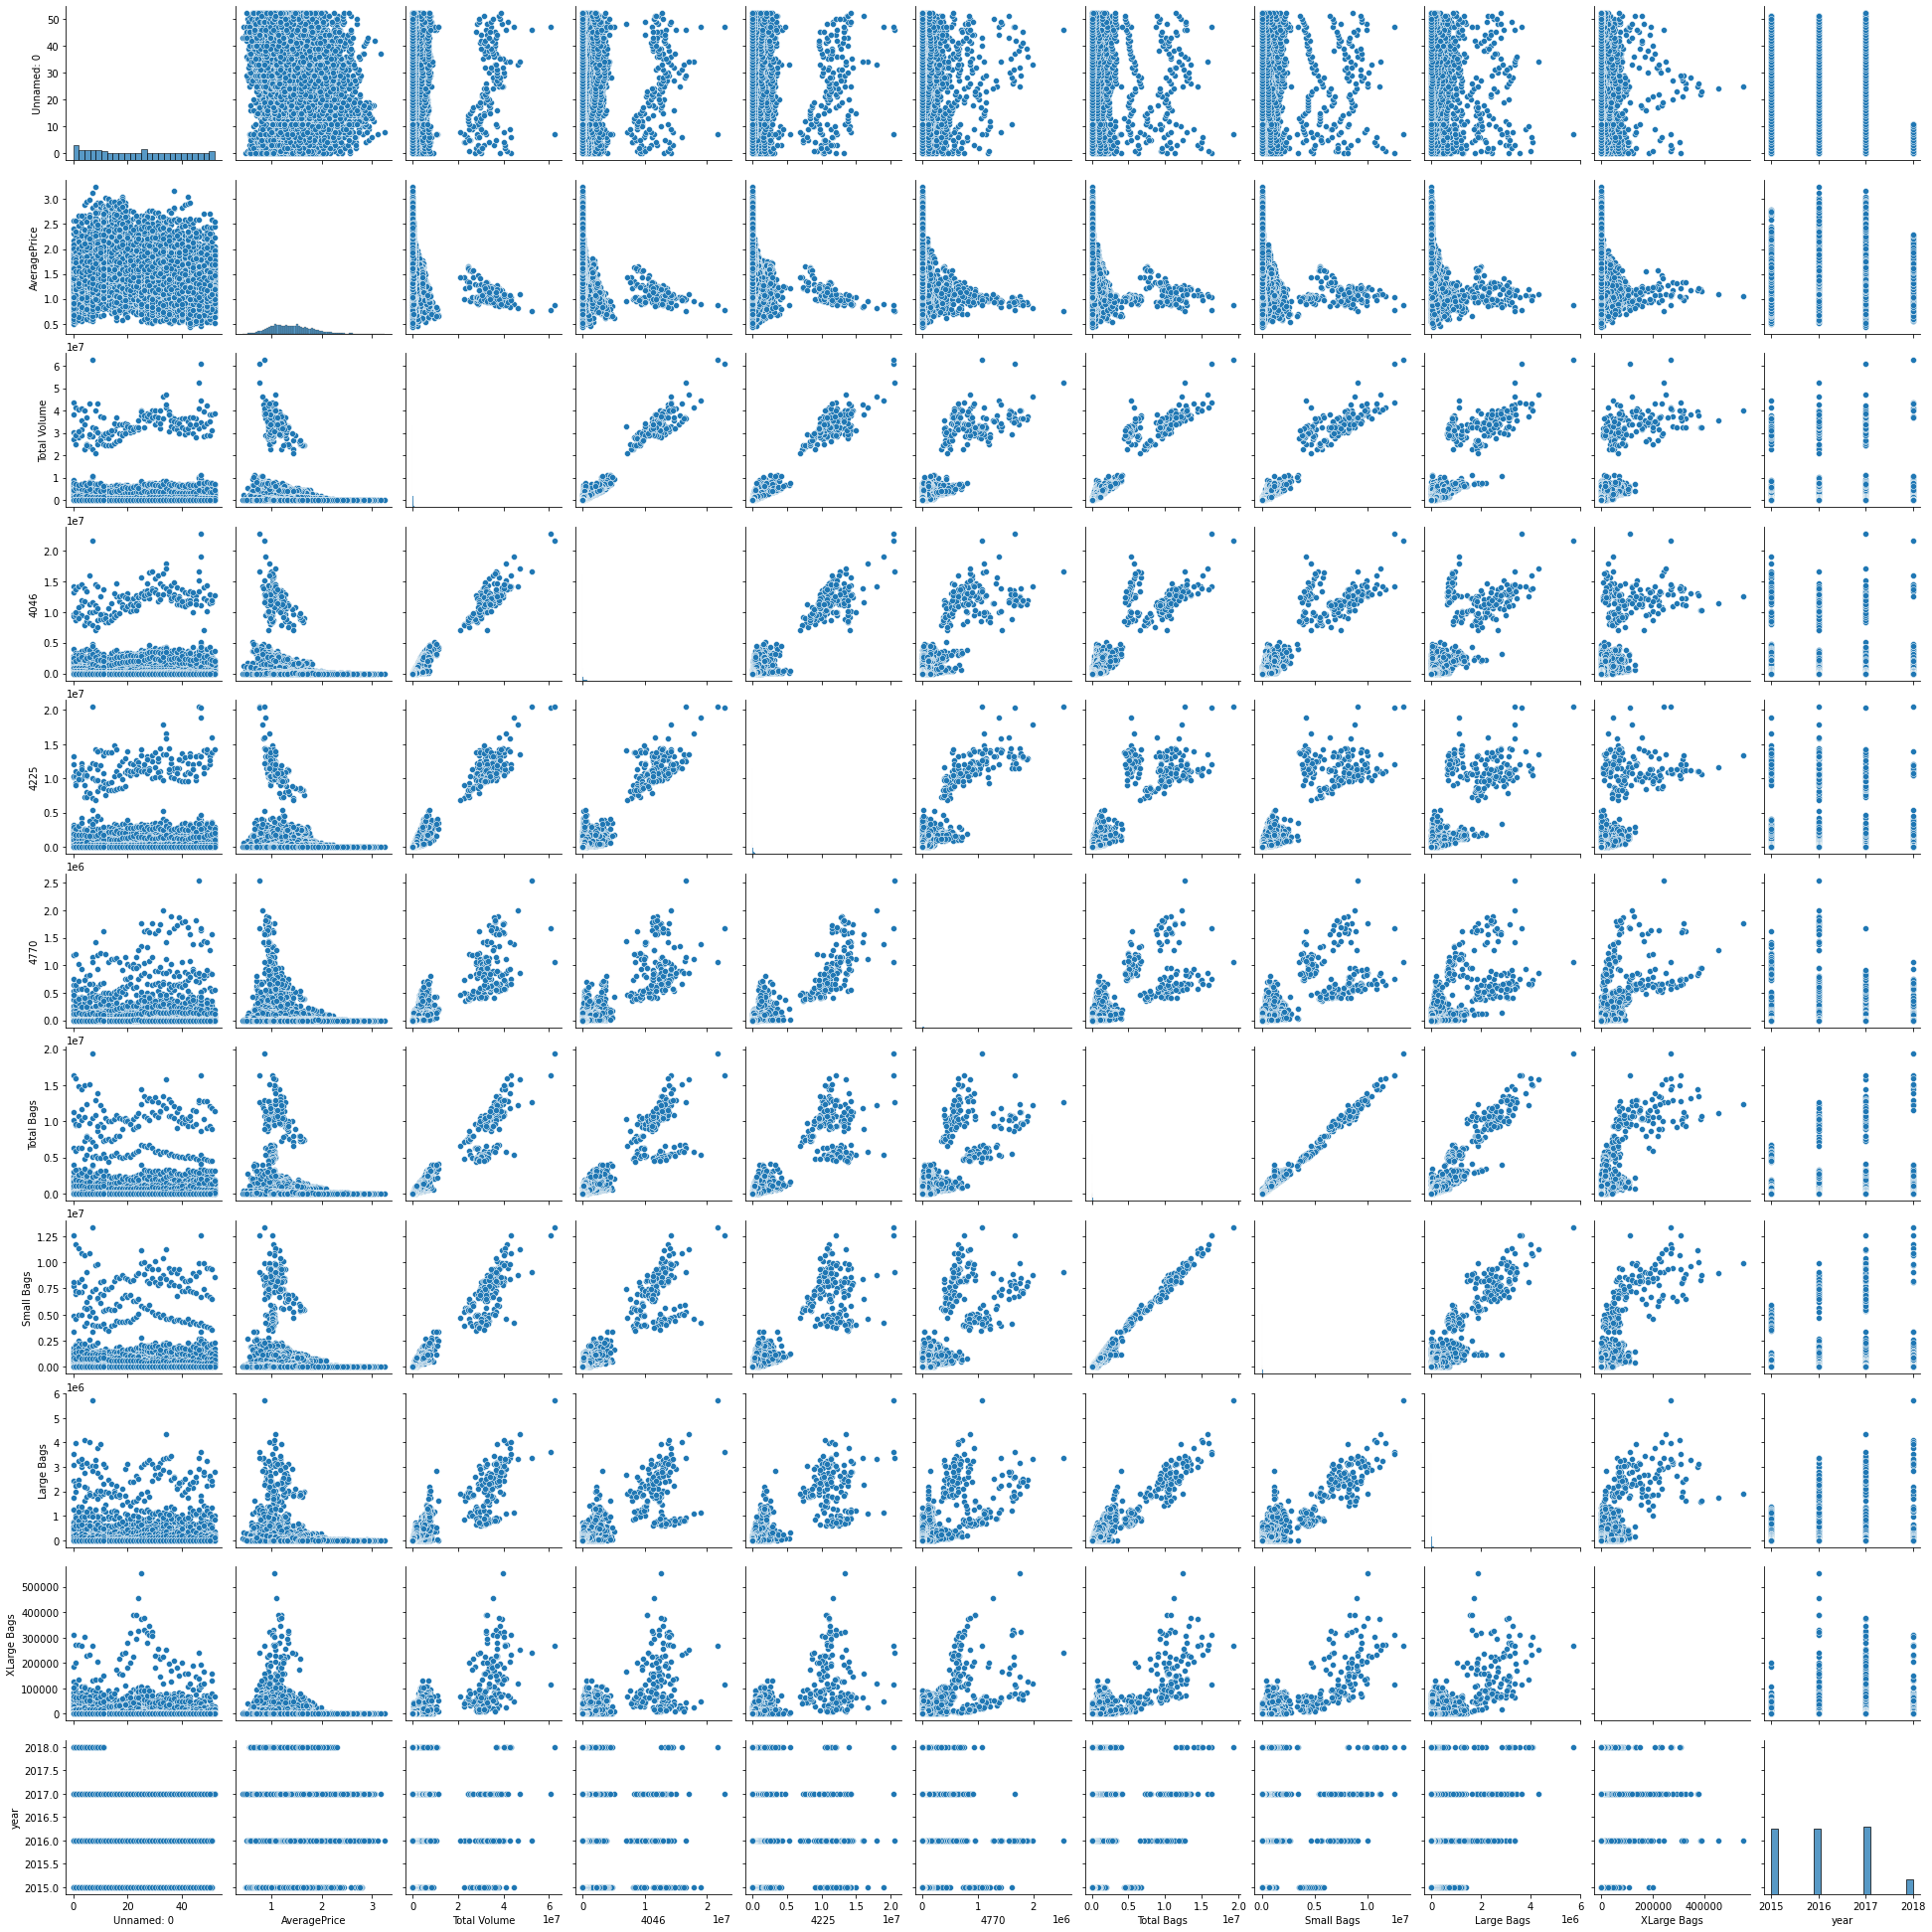

In [39]:
sns.pairplot(df_avacado)

From above observation of the pairplot, we can easily understand the linear relationship of features with target column.

### Multi Variate analysis

Multi variate analysis find the relationship with all variables. Now we will visualize the data and check the coiefficient of multicollinearity

In [40]:
#check correlation
df_avacado.corr()

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.014035  0.017628  0.019829   
AveragePrice   -0.133008      1.000000     -0.192752 -0.208317 -0.172928   
Total Volume    0.014035     -0.192752      1.000000  0.977863  0.974181   
4046            0.017628     -0.208317      0.977863  1.000000  0.926110   
4225            0.019829     -0.172928      0.974181  0.926110  1.000000   
4770            0.041752     -0.179446      0.872202  0.833389  0.887855   
Total Bags     -0.002219     -0.177088      0.963047  0.920057  0.905787   
Small Bags      0.000347     -0.174730      0.967238  0.925280  0.916031   
Large Bags     -0.009196     -0.172940      0.880640  0.838645  0.810015   
XLarge Bags    -0.011546     -0.117592      0.747157  0.699377  0.688809   
year           -0.171667      0.093197      0.017193  0.003353 -0.009559   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.041752   -0.002219    0.000347   -0.009196    -0.011546   
AveragePrice -0.179446   -0.177088   -0.174730   -0.172940    -0.117592   
Total Volume  0.872202    0.963047    0.967238    0.880640     0.747157   
4046          0.833389    0.920057    0.925280    0.838645     0.699377   
4225          0.887855    0.905787    0.916031    0.810015     0.688809   
4770          1.000000    0.792314    0.802733    0.698471     0.679861   
Total Bags    0.792314    1.000000    0.994335    0.943009     0.804233   
Small Bags    0.802733    0.994335    1.000000    0.902589     0.806845   
Large Bags    0.698471    0.943009    0.902589    1.000000     0.710858   
XLarge Bags   0.679861    0.804233    0.806845    0.710858     1.000000   
year         -0.036531    0.071552    0.063915    0.087891     0.081033   

                  year  
Unnamed: 0   -0.171667  
AveragePrice  0.093197  
Total Volume  0.017193  
4046          0.003353  
4225         -0.009559  
4770         -0.036531  
Total Bags    0.071552  
Small Bags    0.063915  
Large Bags    0.087891  
XLarge Bags   0.081033  
year          1.000000

Let's create a heatmap to visualize the data better.

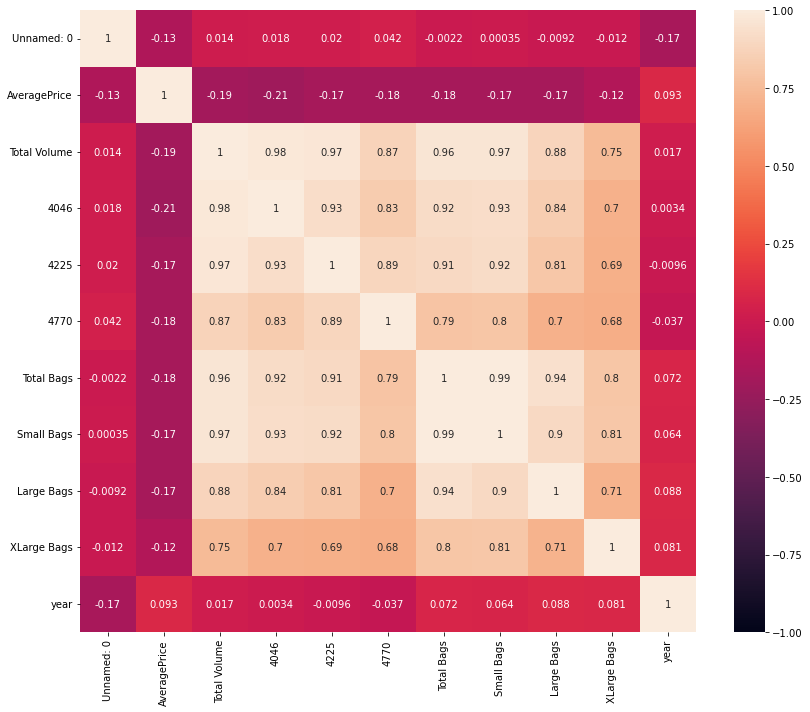

In [41]:
df_correlation = df_avacado.corr()

plt.figure(figsize = (12,10))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True)
plt.tight_layout()

There is high correlation between the all feature columns and the target variable.

#### Find out which columns are positively and negatively correlated with each other


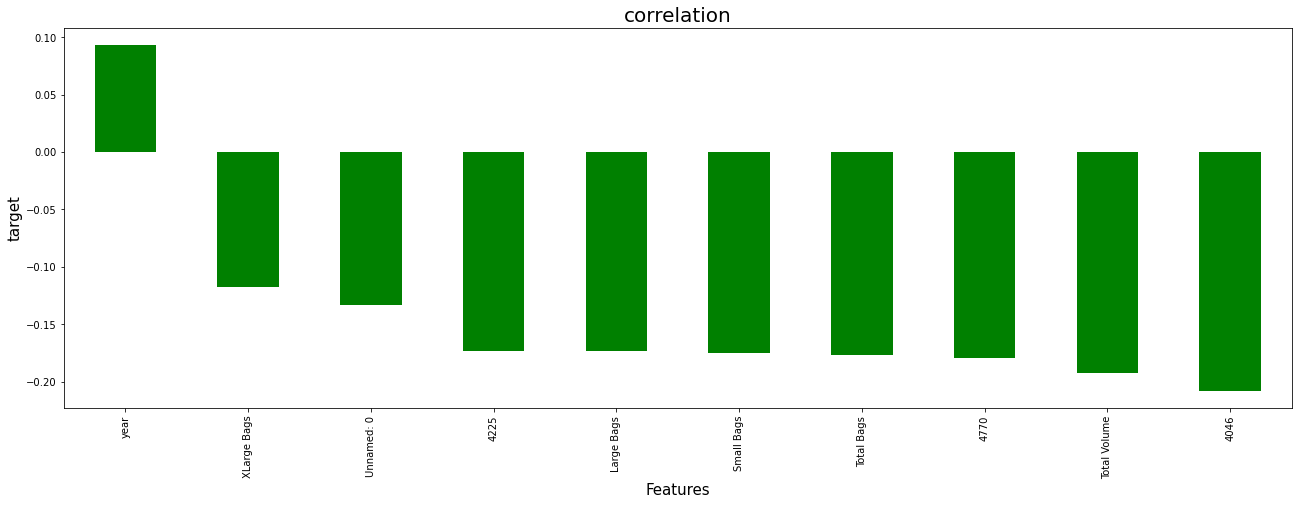

In [42]:
plt.figure(figsize=(22,7))
df_avacado.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind = 'bar', color = 'g')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('target', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

There is high negative correlation between the all feature columns and the target variable except 'year' column.

## Encoding

In [43]:
df_avacado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

### 1. 'Unnamed' column

In [44]:
df_avacado["Unnamed: 0"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [45]:
df_avacado["Unnamed: 0"].value_counts()

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64

As we have seen, the Unnamed column is having unique values. So we can drop this column.

In [46]:
#drop Item_Identifier colum
df_avacado.drop(['Unnamed: 0'], axis=1, inplace=True)

Unnamed column is dropped.

### 2. "type" column

In [47]:
df_avacado["type"].unique()

array(['conventional', 'organic'], dtype=object)

In [48]:
df_avacado["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [49]:
#encoding with label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_avacado['type'] = lb.fit_transform(df_avacado['type'].astype(object))

In [50]:
#after encoding cheking value counts of the column
df_avacado["type"].value_counts()

0    9126
1    9123
Name: type, dtype: int64

### 3. "region" column

In [51]:
df_avacado["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [52]:
df_avacado["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [53]:
#encoding with label encoder
lb = LabelEncoder()
df_avacado['region'] = lb.fit_transform(df_avacado['region'].astype(object))

In [54]:
#after encoding cheking for unique values of this column
df_avacado["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [55]:
df_avacado["region"].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

### 4. "Date" column

In [56]:
df_avacado["Date"].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

In [57]:
df_avacado["Date"].value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

As we can see date column is having all unique values, so we can drop it now.

In [58]:
#dropping the column Date
df_avacado.drop(["Date"], axis=1, inplace=True)

Date column is dropped

In [59]:
df_avacado

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8603.62       93.25          0.0     0  2015       0  
1         9408.07       97.49          0.0     0  2015       0  
2         8042.21      103.14          0.0     0  2015       0  
3         5677.40      133.76          0.0     0  2015       0  
4         5986.26      197.69          0.0     0  2015       0  
...           ...         ...          ...   ...   ...     ...  
18244    13066.82      431.85          0.0     1  2018      53  
18245     8940.04      324.80          0.0     1  2018      53  
18246     9351.80       42.31          0.0     1  2018      53  
18247    10919.54       50.00          0.0     1  2018      53  
18248    11988.14       26.01          0.0     1  2018      53  

[18249 rows x 12 columns]

### Remove Outliers

As we see outliers present in some columns. So, first need to remove it.

### 1. Outlier removal using Zscore


In [60]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy

from scipy.stats import zscore

z_score= zscore(df_avacado[[ 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 
                             'Large Bags', 'XLarge Bags', 'type','year', 'region']]) #Put continuous/float input variable in z-score 

abs_z_score = np.abs(z_score)

data = (abs_z_score < 3).all(axis = 1)

new_df_avacado = df_avacado[data]

print("shape before :", df_avacado.shape)
print("shape after :", new_df_avacado.shape)
print("Percentage Loss :", (df_avacado.shape[0]-new_df_avacado.shape[0])/df_avacado.shape[0])

shape before : (18249, 12)
shape after : (17651, 12)
Percentage Loss : 0.03276891884486821


3.276% data loss after using zscore technique

96.724% data remains

## 2. Outlier Removing using IQR

### from boxplot in EDA, we came to know that outliers present in following columns.

### Visualize data again to check outliers are present at low side or high side


In [61]:
data = df_avacado

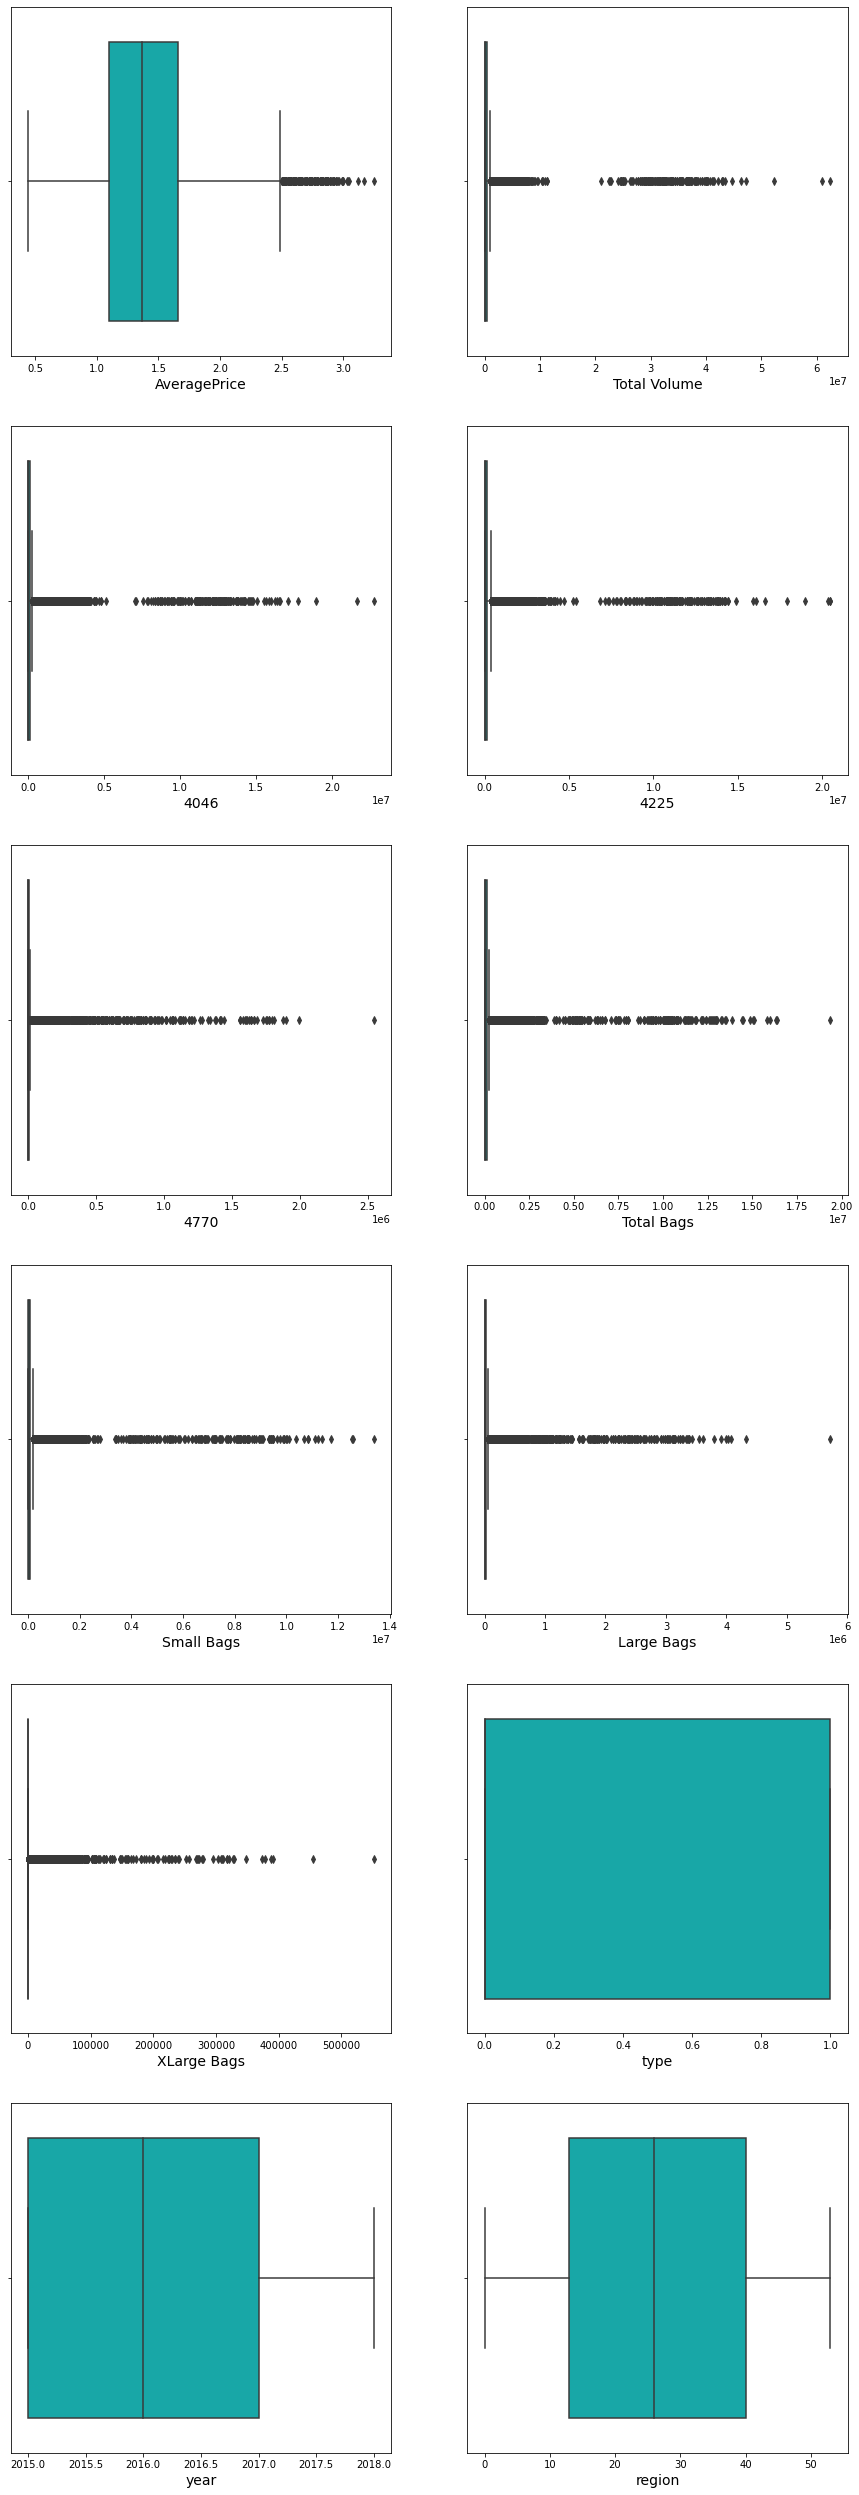

In [62]:
#Relationship Visualizing using boxplot

plt.figure(figsize = (15,45))
plot_number = 1

for i in df_avacado:
    if plot_number <= 13: 
        plt.subplot(6,2,plot_number)
        sns.boxplot(df_avacado[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()


As shown in plot all the columns are having outliers except "type", "year" and "region" columns, so need to remove it first.

In [63]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data.quantile(0.25)

#3rd quantile 75%
q3 = data.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3-q1

In [64]:
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region  
count  18249.000000  18249.000000  
mean    2016.147899     26.495644  
std        0.939938     15.583788  
min     2015.000000      0.000000  
25%     2015.000000     13.000000  
50%     2016.000000     26.000000  
75%     2017.000000     40.000000  
max     2018.000000     53.000000

### Outlier detection formula

- Higher side ==> Q3 + (1.5 * IQR)
- Lower side ==> Q1 - (1.5 * IQR)

as outliers present in higher side only so we will go with higher side formula

In [65]:
#as shown in boxplot we have outlier in higher side of Total_volume
#Remove outliers from higher side so, use higher side formula
Total_volume = (q3 + (1.5*(q3-q1)))
Total_volume = ((4.329623e+05) + (1.5*((4.329623e+05)-(1.083858e+04))))
Total_volume

1066147.88

In [66]:
index_out = np.where(data['Total Volume'] > Total_volume)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

index  AveragePrice  Total Volume     4046       4225    4770  \
0          0          1.33      64236.62  1036.74   54454.85   48.16   
1          1          1.35      54876.98   674.28   44638.81   58.33   
2          2          0.93     118220.22   794.70  109149.67  130.50   
3          3          1.08      78992.15  1132.00   71976.41   72.58   
4          4          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
15947  18244          1.63      17074.83  2046.96    1529.20    0.00   
15948  18245          1.71      13888.04  1191.70    3431.50    0.00   
15949  18246          1.87      13766.76  1191.92    2452.79  727.94   
15950  18247          1.93      16205.22  1527.63    2981.04  727.01   
15951  18248          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
15947    13498.67    13066.82      431.85          0.0     1  2018      53  
15948     9264.84     8940.04      324.80          0.0     1  2018      53  
15949     9394.11     9351.80       42.31          0.0     1  2018      53  
15950    10969.54    10919.54       50.00          0.0     1  2018      53  
15951    12014.15    11988.14       26.01          0.0     1  2018      53  

[15952 rows x 13 columns]

after removing outliers from Total Volume column, 13801 rows will remain in dataframe.

In [67]:
#as shown in boxplot we have outlier in higher side of 4046
#Remove outliers from higher side so, use higher side formula

plu4046 = ((1.110202e+05) + (1.5*((1.110202e+05)-(8.540700e+02))))
plu4046

276269.39499999996

In [68]:
index_out = np.where(data['4046'] > plu4046)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

index  AveragePrice  Total Volume     4046       4225    4770  \
0          0          1.33      64236.62  1036.74   54454.85   48.16   
1          1          1.35      54876.98   674.28   44638.81   58.33   
2          2          0.93     118220.22   794.70  109149.67  130.50   
3          3          1.08      78992.15  1132.00   71976.41   72.58   
4          4          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
15348  18244          1.63      17074.83  2046.96    1529.20    0.00   
15349  18245          1.71      13888.04  1191.70    3431.50    0.00   
15350  18246          1.87      13766.76  1191.92    2452.79  727.94   
15351  18247          1.93      16205.22  1527.63    2981.04  727.01   
15352  18248          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
15348    13498.67    13066.82      431.85          0.0     1  2018      53  
15349     9264.84     8940.04      324.80          0.0     1  2018      53  
15350     9394.11     9351.80       42.31          0.0     1  2018      53  
15351    10969.54    10919.54       50.00          0.0     1  2018      53  
15352    12014.15    11988.14       26.01          0.0     1  2018      53  

[15353 rows x 13 columns]

after removing outliers from "4046" column, 13763 rows will remain in dataframe.

In [69]:
#as shown in boxplot we have outlier in higher side of 4225
#Remove outliers from higher side so, use higher side formula

plu4225 = ((1.502069e+05) + (1.5*((1.502069e+05)-(3.008780e+03))))
plu4225

371004.07999999996

In [70]:
index_out = np.where(data['4225'] > plu4225)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

index  AveragePrice  Total Volume     4046       4225    4770  \
0          0          1.33      64236.62  1036.74   54454.85   48.16   
1          1          1.35      54876.98   674.28   44638.81   58.33   
2          2          0.93     118220.22   794.70  109149.67  130.50   
3          3          1.08      78992.15  1132.00   71976.41   72.58   
4          4          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
14716  18244          1.63      17074.83  2046.96    1529.20    0.00   
14717  18245          1.71      13888.04  1191.70    3431.50    0.00   
14718  18246          1.87      13766.76  1191.92    2452.79  727.94   
14719  18247          1.93      16205.22  1527.63    2981.04  727.01   
14720  18248          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
14716    13498.67    13066.82      431.85          0.0     1  2018      53  
14717     9264.84     8940.04      324.80          0.0     1  2018      53  
14718     9394.11     9351.80       42.31          0.0     1  2018      53  
14719    10969.54    10919.54       50.00          0.0     1  2018      53  
14720    12014.15    11988.14       26.01          0.0     1  2018      53  

[14721 rows x 13 columns]

After removing outliers from "4225" column 13761 rows will remain in dataframe.

In [71]:
#as shown in boxplot we have outlier in higher side of 4770
#Remove outliers from higher side so, use higher side formula

plu4770 = ((6.243420e+03) + (1.5*((6.243420e+03)-(0.000000e+00))))
plu4770

15608.550000000001

In [72]:
index_out = np.where(data['4770'] > plu4770)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

index  AveragePrice  Total Volume     4046       4225    4770  \
0          0          1.33      64236.62  1036.74   54454.85   48.16   
1          1          1.35      54876.98   674.28   44638.81   58.33   
2          2          0.93     118220.22   794.70  109149.67  130.50   
3          3          1.08      78992.15  1132.00   71976.41   72.58   
4          4          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
13750  18244          1.63      17074.83  2046.96    1529.20    0.00   
13751  18245          1.71      13888.04  1191.70    3431.50    0.00   
13752  18246          1.87      13766.76  1191.92    2452.79  727.94   
13753  18247          1.93      16205.22  1527.63    2981.04  727.01   
13754  18248          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
13750    13498.67    13066.82      431.85          0.0     1  2018      53  
13751     9264.84     8940.04      324.80          0.0     1  2018      53  
13752     9394.11     9351.80       42.31          0.0     1  2018      53  
13753    10969.54    10919.54       50.00          0.0     1  2018      53  
13754    12014.15    11988.14       26.01          0.0     1  2018      53  

[13755 rows x 13 columns]

After removing outliers in "4770" column, 13147 rows will remain in dataframe.

In [73]:
#as shown in boxplot we have outlier in higher side of Total Bags
#Remove outliers from higher side so, use higher side formula

Total_Bags = ((1.107834e+05) + (1.5*((1.107834e+05)-(5.088640e+03))))
Total_Bags

269325.54

In [74]:
index_out = np.where(data['Total Bags'] > Total_Bags)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

index  AveragePrice  Total Volume     4046       4225    4770  \
0          0          1.33      64236.62  1036.74   54454.85   48.16   
1          1          1.35      54876.98   674.28   44638.81   58.33   
2          2          0.93     118220.22   794.70  109149.67  130.50   
3          3          1.08      78992.15  1132.00   71976.41   72.58   
4          4          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
13534  18244          1.63      17074.83  2046.96    1529.20    0.00   
13535  18245          1.71      13888.04  1191.70    3431.50    0.00   
13536  18246          1.87      13766.76  1191.92    2452.79  727.94   
13537  18247          1.93      16205.22  1527.63    2981.04  727.01   
13538  18248          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
13534    13498.67    13066.82      431.85          0.0     1  2018      53  
13535     9264.84     8940.04      324.80          0.0     1  2018      53  
13536     9394.11     9351.80       42.31          0.0     1  2018      53  
13537    10969.54    10919.54       50.00          0.0     1  2018      53  
13538    12014.15    11988.14       26.01          0.0     1  2018      53  

[13539 rows x 13 columns]

After removing outliers in "Total Bags" column, 13141 rows will remain in dataframe.

In [75]:
#as shown in boxplot we have outlier in higher side of Small Bags
#Remove outliers from higher side so, use higher side formula

Small_Bags = ((8.333767e+04) + (1.5*((8.333767e+04)-(2.849420e+03))))
Small_Bags

204070.04499999998

In [76]:
index_out = np.where(data['Small Bags'] > Small_Bags)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

index  AveragePrice  Total Volume     4046       4225    4770  \
0          0          1.33      64236.62  1036.74   54454.85   48.16   
1          1          1.35      54876.98   674.28   44638.81   58.33   
2          2          0.93     118220.22   794.70  109149.67  130.50   
3          3          1.08      78992.15  1132.00   71976.41   72.58   
4          4          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
13500  18244          1.63      17074.83  2046.96    1529.20    0.00   
13501  18245          1.71      13888.04  1191.70    3431.50    0.00   
13502  18246          1.87      13766.76  1191.92    2452.79  727.94   
13503  18247          1.93      16205.22  1527.63    2981.04  727.01   
13504  18248          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
13500    13498.67    13066.82      431.85          0.0     1  2018      53  
13501     9264.84     8940.04      324.80          0.0     1  2018      53  
13502     9394.11     9351.80       42.31          0.0     1  2018      53  
13503    10969.54    10919.54       50.00          0.0     1  2018      53  
13504    12014.15    11988.14       26.01          0.0     1  2018      53  

[13505 rows x 13 columns]

After removing outliers in "Small Bags" column, 13121 rows will remain in dataframe.

In [77]:
#as shown in boxplot we have outlier in higher side of Large Bags
#Remove outliers from higher side so, use higher side formula

Large_Bags = ((2.202925e+04	) + (1.5*((2.202925e+04	)-(1.274700e+02))))
Large_Bags

54881.92

In [78]:
index_out = np.where(data['Large Bags'] > Large_Bags)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

index  AveragePrice  Total Volume     4046       4225    4770  \
0          0          1.33      64236.62  1036.74   54454.85   48.16   
1          1          1.35      54876.98   674.28   44638.81   58.33   
2          2          0.93     118220.22   794.70  109149.67  130.50   
3          3          1.08      78992.15  1132.00   71976.41   72.58   
4          4          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
12960  18244          1.63      17074.83  2046.96    1529.20    0.00   
12961  18245          1.71      13888.04  1191.70    3431.50    0.00   
12962  18246          1.87      13766.76  1191.92    2452.79  727.94   
12963  18247          1.93      16205.22  1527.63    2981.04  727.01   
12964  18248          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
12960    13498.67    13066.82      431.85          0.0     1  2018      53  
12961     9264.84     8940.04      324.80          0.0     1  2018      53  
12962     9394.11     9351.80       42.31          0.0     1  2018      53  
12963    10969.54    10919.54       50.00          0.0     1  2018      53  
12964    12014.15    11988.14       26.01          0.0     1  2018      53  

[12965 rows x 13 columns]

After removing outliers in "Large Bags" column, 12720 rows will remain in dataframe.

In [79]:
#as shown in boxplot we have outlier in higher side of XLarge Bags
#Remove outliers from higher side so, use higher side formula

XLarge_Bags = ((132.500000) + (1.5*((132.500000)-(0.000000))))
XLarge_Bags

331.25

In [80]:
index_out = np.where(data['XLarge Bags'] > XLarge_Bags)
data = data.drop(data.index[index_out])
data.shape
data.reset_index()

index  AveragePrice  Total Volume     4046       4225    4770  \
0          0          1.33      64236.62  1036.74   54454.85   48.16   
1          1          1.35      54876.98   674.28   44638.81   58.33   
2          2          0.93     118220.22   794.70  109149.67  130.50   
3          3          1.08      78992.15  1132.00   71976.41   72.58   
4          4          1.28      51039.60   941.48   43838.39   75.78   
...      ...           ...           ...      ...        ...     ...   
11742  18244          1.63      17074.83  2046.96    1529.20    0.00   
11743  18245          1.71      13888.04  1191.70    3431.50    0.00   
11744  18246          1.87      13766.76  1191.92    2452.79  727.94   
11745  18247          1.93      16205.22  1527.63    2981.04  727.01   
11746  18248          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
11742    13498.67    13066.82      431.85          0.0     1  2018      53  
11743     9264.84     8940.04      324.80          0.0     1  2018      53  
11744     9394.11     9351.80       42.31          0.0     1  2018      53  
11745    10969.54    10919.54       50.00          0.0     1  2018      53  
11746    12014.15    11988.14       26.01          0.0     1  2018      53  

[11747 rows x 13 columns]

After removing outliers in "XLarge Bags" column, 11615 rows will remain in dataframe.

#### After removing outliers using IQR technique there are 11615 rows will remain in dataset.

Now, find how much data loss in IQR method

In [81]:
((18249-11615)/18249)*100

36.352676859005975

36.352% data loss in IQR method

63.648% data remains after removing outliers using IQR technique

### After applying Zscore and IQR technique to remove outliers, we conclude that from IQR technique 36.352% data will be lost and from Zscore technique only 3.276% data will be lost so we can use Zscore method to remove the outliers.

## Check the skewness and remove that


In [82]:
new_df_avacado.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

As we see there are some variable is skewed, whoes value is not lies between -0.5 to +0.5 this range.

1.Total Volume  
2.4046  
3.4225  
4.4770  
5.Total Bags  
6.Small Bags  
7.Large Bags  
8.XLarge Bags  

#### We need to remove skewness from newspaper column

## Apply Power transformation to remove skewness


In power transformation we will take the mean value in place of 0th value skewed data and convert that into normal data(distribution)/less skewed data.

In [83]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

new_df_avacado['Total Volume'] = scaler.fit_transform(new_df_avacado['Total Volume'].values.reshape(-1,1))
new_df_avacado['4046'] = scaler.fit_transform(new_df_avacado['4046'].values.reshape(-1,1))
new_df_avacado['4225'] = scaler.fit_transform(new_df_avacado['4225'].values.reshape(-1,1))
new_df_avacado['4770'] = scaler.fit_transform(new_df_avacado['4770'].values.reshape(-1,1))
new_df_avacado['Total Bags'] = scaler.fit_transform(new_df_avacado['Total Bags'].values.reshape(-1,1))
new_df_avacado['Small Bags'] = scaler.fit_transform(new_df_avacado['Small Bags'].values.reshape(-1,1))
new_df_avacado['Large Bags'] = scaler.fit_transform(new_df_avacado['Large Bags'].values.reshape(-1,1))
new_df_avacado['XLarge Bags'] = scaler.fit_transform(new_df_avacado['XLarge Bags'].values.reshape(-1,1))

In [84]:
new_df_avacado.skew()


AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

#### after using log transformation we can see the skewness of all the columns get reduced.

Now we can check skewness using distplot also

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

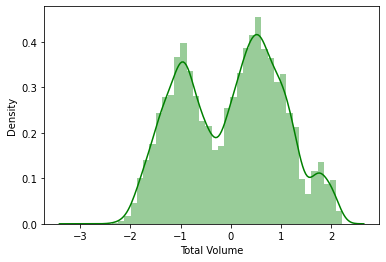

In [85]:
sns.distplot(new_df_avacado['Total Volume'], color='g')

<AxesSubplot:xlabel='4046', ylabel='Density'>

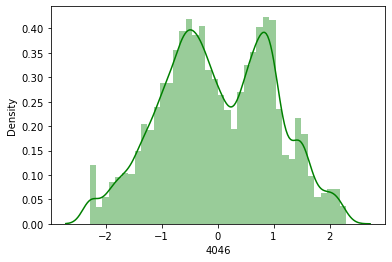

In [86]:
sns.distplot(new_df_avacado['4046'], color='g')

<AxesSubplot:xlabel='4225', ylabel='Density'>

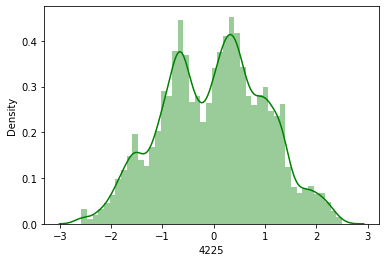

In [87]:
sns.distplot(new_df_avacado['4225'], color='g')

<AxesSubplot:xlabel='4770', ylabel='Density'>

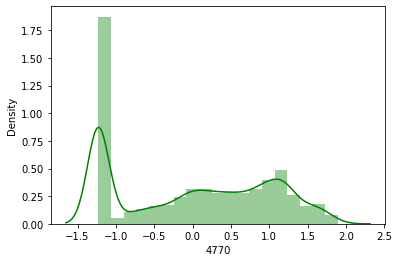

In [88]:
sns.distplot(new_df_avacado['4770'], color='g')

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

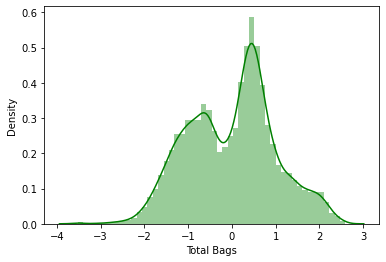

In [89]:
sns.distplot(new_df_avacado['Total Bags'], color='g')

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

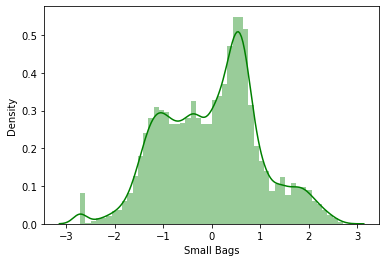

In [90]:
sns.distplot(new_df_avacado['Small Bags'], color='g')

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

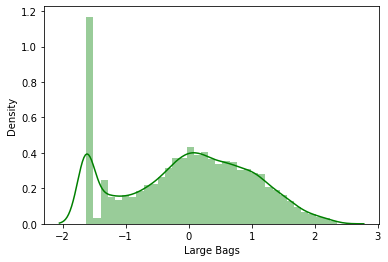

In [91]:
sns.distplot(new_df_avacado['Large Bags'], color='g')

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

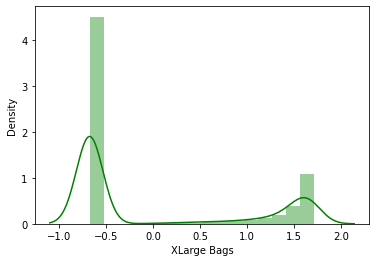

In [92]:
sns.distplot(new_df_avacado['XLarge Bags'], color='g')

As shown in plot skewness removes after using power transformation skewness removal technique.

## Preparing Data for Model Building:

## 1. Regression Model

#### X=Features, Y=Target

In [93]:
#Seperating the columns into featuers and target:
x = new_df_avacado.drop(columns = 'AveragePrice', axis=1)
y = new_df_avacado['AveragePrice']

### Scalling technique


In [94]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

using standard scaler technique variables are scaled now.

## Variance inflation factor


In [95]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

vif      Features
0   53.757749  Total Volume
1    7.256311          4046
2   11.390169          4225
3    3.938316          4770
4   35.050454    Total Bags
5   16.619348    Small Bags
6    3.459743    Large Bags
7    2.045620   XLarge Bags
8    3.697055          type
9    1.328062          year
10   1.086896        region

as we have seen in the table, vif value of some columns is greater than 5, so drop maximum value column to avoid multiclinearity issue.

In [96]:
new_df_avacado = new_df_avacado.drop(['Total Volume', 'Total Bags'], axis=1)

In [97]:
x = new_df_avacado.drop(columns = 'AveragePrice', axis=1)
y = new_df_avacado['AveragePrice']

x1_scalar = ss.fit_transform(x)

In [98]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x1_scalar, i) for i in range(x1_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

vif     Features
0  3.712579         4046
1  4.157846         4225
2  3.925498         4770
3  4.095648   Small Bags
4  1.866989   Large Bags
5  2.029940  XLarge Bags
6  3.476583         type
7  1.302488         year
8  1.079017       region

as we have seen in the table, vif value is near about 5 for all the columns, so we can proceed further now.

## Finding best random state


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [103]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=i)
    lr_= LinearRegression()
    lr_.fit(x_train, y_train)
    pred = lr_.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.5016236310940051 on Random_state  196


In [104]:
x_train,x_test,y_train,y_test = train_test_split(x1_scalar, y, test_size=.20, random_state = 196)


## 1.Linear Regression Model


In [105]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()

lr.fit(x_train, y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)

lr_r2 = r2_score(y_test,pred_lr)
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)

print('R2 Score: ',lr_r2)
print('Mean absolute error: ', mae_lr)
print('Mean squared error: ', mse_lr)
print('Root Mean squared error: ', np.sqrt(mse_lr))

R2 Score:  0.5016236310940021
Mean absolute error:  0.2119565626929318
Mean squared error:  0.0729707595936981
Root Mean squared error:  0.27013100450281174


### Regularization

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameters = { "max_iter": [1000,1500,2000,2500],
            "solver": ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rg = Ridge()
rg_gsv = GridSearchCV(rg, parameters)
rg_gsv.fit(x_train, y_train)

print(rg_gsv.best_params_)

{'max_iter': 2000, 'solver': 'sag'}


In [107]:
rg = Ridge(max_iter = 2000, solver = 'sag')

rg.fit(x_train, y_train)
rg.score(x_train, y_train)
pred_rg = rg.predict(x_test)

rg_r2 = r2_score(y_test, pred_rg)
mae_rg = mean_absolute_error(y_test,pred_rg)
mse_rg = mean_squared_error(y_test,pred_rg)

print('R2 Score: ',rg_r2)
print('Mean absolute error: ', mae_rg)
print('Mean squared error: ', mse_rg)
print('Root Mean squared error: ', np.sqrt(mse_rg))

R2 Score:  0.5016297677781727
Mean absolute error:  0.21195205712296727
Mean squared error:  0.07296986107897459
Root Mean squared error:  0.27012934138848116


R2 score for linear regression model is : 50.16%

## 2. Random Forest Regressor


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
rfr= RandomForestRegressor()
rfr_gsv =GridSearchCV(rfr, parameters)
rfr_gsv.fit(x_train, y_train)

print(rfr_gsv.best_params_)

In [109]:
rfr =RandomForestRegressor(criterion = "mse", max_features="sqrt")

rfr.fit(x_train, y_train)
rfr.score(x_train, y_train)
pred_rfr = rfr.predict(x_test)

rfr_r2 = r2_score(y_test,pred_rfr)
mae_rfr = mean_absolute_error(y_test,pred_rfr)
mse_rfr = mean_squared_error(y_test,pred_rfr)

print('R2 Score: ',rfr_r2)
print('Mean absolute error: ', mae_rfr)
print('Mean squared error: ', mse_rfr)
print('Root Mean squared error: ', np.sqrt(mse_rfr))

R2 Score:  0.851495312728432
Mean absolute error:  0.10527839139054092
Mean squared error:  0.021743606859246676
Root Mean squared error:  0.14745713566744295


R2 score for Random Forest Regressor model is : 85.14%

## 3. AdaBoost Regressor

In [110]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()

ada.fit(x_train, y_train)
ada.score(x_train,y_train)
pred_ada = ada.predict(x_test)

ada_r2 = r2_score(y_test,pred_ada)
mae_ada = mean_absolute_error(y_test,pred_ada)
mse_ada = mean_squared_error(y_test,pred_ada)

print('R2 Score: ',ada_r2)
print('Mean absolute error: ', mae_ada)
print('Mean squared error: ', mse_ada)
print('Root Mean squared error: ', np.sqrt(mse_ada))

R2 Score:  0.5273397426355362
Mean absolute error:  0.21135005258612458
Mean squared error:  0.06920548437187884
Root Mean squared error:  0.2630693527796023


R2 score for AdaBoost Regressor model is : 52.73%

## 4. Decision Tree Regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)
dtr.score(x_train,y_train)
pred_dtr = dtr.predict(x_test)

dtr_r2 = r2_score(y_test,pred_dtr)
mae_dtr = mean_absolute_error(y_test,pred_dtr)
mse_dtr = mean_squared_error(y_test,pred_dtr)

print('R2 Score: ',dtr_r2)
print('Mean absolute error: ', mae_dtr)
print('Mean squared error: ', mse_dtr)
print('Root Mean squared error: ', np.sqrt(mse_dtr))

R2 Score:  0.6828198672812591
Mean absolute error:  0.14143868592466724
Mean squared error:  0.046440555083545734
Root Mean squared error:  0.21550070784929162


R2 score for Decision tree Regressor model is : 68.28%

## 5. Support vector Regressor


In [112]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(x_train, y_train)
svr.score(x_train,y_train)
pred_svr = svr.predict(x_test)

svr_r2 = r2_score(y_test,pred_svr)
mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)

print('R2 Score: ',svr_r2)
print('Mean absolute error: ', mae_svr)
print('Mean squared error: ', mse_svr)
print('Root Mean squared error: ', np.sqrt(mse_svr))

R2 Score:  0.7145240248901048
Mean absolute error:  0.15021185697948602
Mean squared error:  0.041798528279437454
Root Mean squared error:  0.204446883760642


R2 score for SVR model is : 71.45%

## Comparison of all model


        Algorithms                 R2 Score       
    
1. Linear Regression           :    50.16%    
2. Random Forest Regressor     :    85.14%      
3. Adaboost Regressor          :    52.73%    
4. Decision Tree Regressor     :    68.28%       
5. Support Vector Regressor    :    71.45%    

### as shown in above table Random Forest Regression is having maximum R2 score, so Random Forest Regression is best model


## Hyperparameter tuning

In [113]:
#Random forest Regression
# see all the parameters of random forest Regressor
Parameters = {'n_estimators' : [200, 700],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [4, 5, 6, 7, 8]}

GCV=GridSearchCV(RandomForestRegressor(),Parameters,cv=5)

#fit the all parameters in grid search cv and see the output
GCV.fit(x_train, y_train) 

GCV.best_params_ # printing the best parameters found by GridSearchCV


{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 700}

In [114]:
rfr = RandomForestRegressor( max_depth=8 , max_features='auto', n_estimators=700)

rfr.fit(x_train, y_train)
pred_rfr =rfr.predict(x_test)
rfr_r2 = r2_score(y_test, pred_rfr)
mae_rfr = mean_absolute_error(y_test,pred_rfr)
mse_rfr = mean_squared_error(y_test,pred_rfr)

print('R2 Score: ',rfr_r2)
print('Mean absolute error: ', mae_rfr)
print('Mean squared error: ', mse_rfr)
print('Root Mean squared error: ', np.sqrt(mse_rfr))

R2 Score:  0.7247130451979915
Mean absolute error:  0.14979229578830736
Mean squared error:  0.04030668276313782
Root Mean squared error:  0.20076524291604317


### after hyper parameter tunning R2 score of final model is: 72.47% 

## Saving the best Regression model


In [116]:
import joblib

filename = "Avacado_Regression_Model.pkl"
joblib.dump(rfr,filename)


['Avacado_Regression_Model.pkl']

### Final Conclusion for Regression model

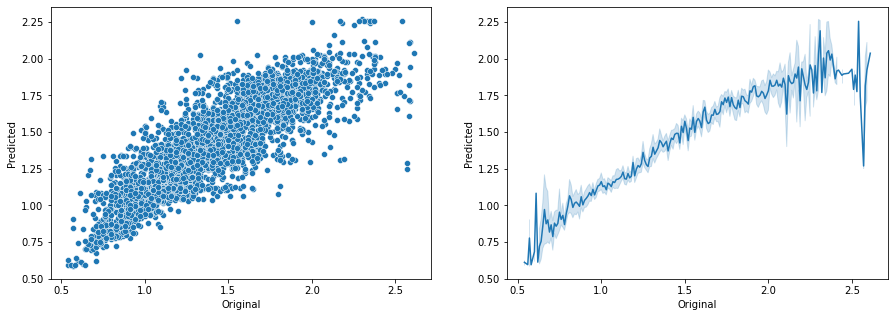

In [120]:
#visualizing original and predicted value with the help of scatterplot and lineplot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(y_test,pred_rfr,ax=ax1)
ax1.set_xlabel("Original")
ax1.set_ylabel("Predicted")

sns.lineplot(y_test,pred_rfr,ax=ax2)
ax2.set_xlabel("Original")
ax2.set_ylabel("Predicted")

plt.show()

#### The Final Regression Model Random Forest Regressor performs well with R2 Score of 72.47%.

## 2. Classification Model

#### X=Features, Y=Target

In [121]:
#Seperating the columns into featuers and target:
x = new_df_avacado.drop(columns = 'region', axis=1)
y = new_df_avacado['region']

### Scalling technique

In [122]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xx_scalar = ss.fit_transform(x)

using standard scaler technique, variables are scaled now

## Variance Inflation Factor

In [123]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(xx_scalar, i) for i in range(xx_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

vif      Features
0  1.899012  AveragePrice
1  3.582512          4046
2  4.317676          4225
3  3.935185          4770
4  4.130641    Small Bags
5  2.043340    Large Bags
6  2.027165   XLarge Bags
7  3.986884          type
8  1.359078          year

as we have seen in the table, vif value is near about 5 for all the columns, so we can proceed further now.

## Finding Best Random State

In [125]:
from sklearn.tree import DecisionTreeClassifier

maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    dtr_= DecisionTreeClassifier()
    dtr_.fit(x_train, y_train)
    pred = dtr_.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.6302162083256108 on Random_state  92


In [128]:
x_train,x_test,y_train,y_test = train_test_split(x1_scalar, y, test_size=.30, random_state = 92)


## 1. AdaBoost Classifier

In [137]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(x_train, y_train)
ada.score(x_train,y_train)
pred_ada = ada.predict(x_test)

accu_ada = accuracy_score(y_test,pred_ada)
con_ada = confusion_matrix(y_test,pred_ada)
cla_ada = classification_report(y_test,pred_ada)

print('Accuracy Score: ',accu_ada)
print(con_ada)
print(cla_ada)

Accuracy Score:  0.24244712990936557
[[ 98   0   0 ...   0   0   0]
 [  0  93   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0  82   0]
 [  0   0   0 ...   0   0 113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        93
           2       0.00      0.00      0.00        99
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00       103
           5       0.00      0.00      0.00        98
           6       0.00      0.00      0.00        79
           7       0.05      1.00      0.10        88
           8       0.00      0.00      0.00       109
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00        97
          11       0.00      0.00      0.00       107
          12       0.00      0.00      0.00       108
          13  

The Accuracy Score of AdaBoost Classifier model is : 24.24%

## 3. Decision Tree Classifier

In [138]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)
dtr.score(x_train,y_train)
pred_dtr = dtr.predict(x_test)

accu_dtr = accuracy_score(y_test,pred_dtr)
con_dtr = confusion_matrix(y_test,pred_dtr)
cla_dtr = classification_report(y_test,pred_dtr)

print('Accuracy Score: ',accu_dtr)
print(con_dtr)
print(cla_dtr)

Accuracy Score:  1.0
[[ 98   0   0 ...   0   0   0]
 [  0  93   0 ...   0   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0  82   0]
 [  0   0   0 ...   0   0 113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00       107
           4       1.00      1.00      1.00       103
           5       1.00      1.00      1.00        98
           6       1.00      1.00      1.00        79
           7       1.00      1.00      1.00        88
           8       1.00      1.00      1.00       109
           9       1.00      1.00      1.00       104
          10       1.00      1.00      1.00        97
          11       1.00      1.00      1.00       107
          12       1.00      1.00      1.00       108
          13       1.00      1

The Accuracy Score of Decision Tree Classifier model is: 100%

### 4. Support Vector Classifier

In [139]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)
svc.score(x_train,y_train)
pred_svc = svc.predict(x_test)

accu_svc = accuracy_score(y_test,pred_svc)
con_svc = confusion_matrix(y_test,pred_svc)
cla_svc = classification_report(y_test,pred_svc)

print('Accuracy Score: ',accu_svc)
print(con_svc)
print(cla_svc)

Accuracy Score:  0.9590256797583081
[[ 98   0   0 ...   0   0   0]
 [  0  93   0 ...   0   0   0]
 [  0   0  99 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   1  81   0]
 [  0   0   0 ...   0   0 111]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       1.00      1.00      1.00        93
           2       0.97      1.00      0.99        99
           3       0.97      1.00      0.99       107
           4       0.99      0.97      0.98       103
           5       1.00      0.92      0.96        98
           6       0.99      1.00      0.99        79
           7       0.98      0.99      0.98        88
           8       1.00      0.98      0.99       109
           9       0.94      0.96      0.95       104
          10       0.94      0.95      0.94        97
          11       1.00      1.00      1.00       107
          12       0.99      0.99      0.99       108
          13   

The Accuracy Score of Support Vector Classifier model is : 95.90%

### Comparison of all models

 Algorithms                       Accuracy Score   
 
1. Adaboost Classifier          :    24.24%     
2. Decision Tree Classifier     :    100%      
3. Support Vector Classifier    :    95.90%    

### as shown in above table Decision Tree Classifier is having maximum Accuracy Score, so Decision Tree Classifier is the best model


### Hyperparameter Tuning

In [142]:
#Decision Tree Regression
dtc = DecisionTreeClassifier()
grid_param = {
   "criterion": ['gini','entropy'],
    "splitter": ['best','random']   
}

grid = GridSearchCV(estimator=dtc, 
                    param_grid=grid_param,
                    scoring='accuracy')
grid.fit(x_train,y_train)
print(grid)

#summarize the results of the grid search
print(grid.best_params_)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')
{'criterion': 'gini', 'splitter': 'best'}


In [143]:
dtc = DecisionTreeClassifier()
dtc = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')

dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)

pred_dtc = dtc.predict(x_test)
dtc_r2 = r2_score(y_test, pred_dtc)
mae_dtc = mean_absolute_error(y_test,pred_dtc)
mse_dtc = mean_squared_error(y_test,pred_dtc)

print('R2 Score: ',dtc_r2)
print('Mean absolute error: ', mae_dtc)
print('Mean squared error: ', mse_dtc)
print('Root Mean squared error: ', np.sqrt(mse_dtc))

R2 Score:  1.0
Mean absolute error:  0.0
Mean squared error:  0.0
Root Mean squared error:  0.0


#### From above models, DecisionTreeClassifier performs best with accuracy score of 100%. 

## Saving the best Classification model

In [145]:
import joblib

filename = "Avacado_Classification_Model.pkl"
joblib.dump(dtc,filename)


['Avacado_Classification_Model.pkl']

### Final Conclusion for Classification model

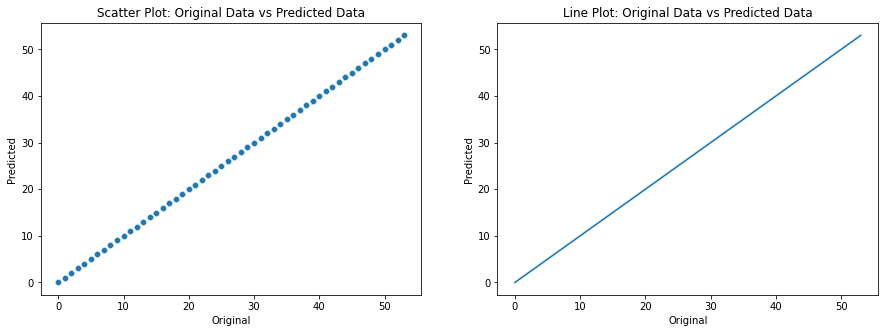

In [148]:
#Visualizing original and predicted value with the help of scatterplot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(y_test,pred_dtc,ax=ax1)
ax1.set_title("Scatter Plot: Original Data vs Predicted Data")
ax1.set_xlabel("Original")
ax1.set_ylabel("Predicted")

sns.lineplot(y_test,pred_dtc,ax=ax2)
ax2.set_title("Line Plot: Original Data vs Predicted Data")
ax2.set_xlabel("Original")
ax2.set_ylabel("Predicted")

plt.show()

#### Final model Decision Tree Classifier performs well with an accuracy score of 100%.



## Conclusion

1. We built two model from the avocado dataset. One is Classification model and the other one is Regression model.

2. We did EDA to have a better understanding of the data and how we could process it to build our models.

3. For the classification model, we found that Decision Tree Classifier performs well with accuracy of 100%.

4. For the Regression model, we found that Random Forest Regressor performs well with R2 Score of 72.47%.